# 1. Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


# 2. Exploratory Data Analysis (EDA)
## Basic Data Overview

In [ ]:
# Basic structure and summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB
None


In [ ]:
print(data.describe())

                      Date         High          Low         Open  \
count                 1825  1825.000000  1825.000000  1825.000000   
mean   2018-05-23 00:00:00  2660.718673  2632.817580  2647.704751   
min    2015-11-23 00:00:00  1847.000000  1810.099976  1833.400024   
25%    2017-02-21 00:00:00  2348.350098  2322.250000  2341.979980   
50%    2018-05-23 00:00:00  2696.250000  2667.840088  2685.489990   
75%    2019-08-22 00:00:00  2930.790039  2900.709961  2913.860107   
max    2020-11-20 00:00:00  3645.989990  3600.159912  3612.090088   
std                    NaN   409.680853   404.310068   407.169994   

             Close        Volume    Adj Close  
count  1825.000000  1.825000e+03  1825.000000  
mean   2647.856284  3.869627e+09  2647.856284  
min    1829.079956  1.296540e+09  1829.079956  
25%    2328.949951  3.257950e+09  2328.949951  
50%    2683.340088  3.609740e+09  2683.340088  
75%    2917.520020  4.142850e+09  2917.520020  
max    3626.909912  9.044690e+09  3626.909

In [ ]:
print(data.head())

        Date         High          Low         Open        Close  \
0 2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1 2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2 2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3 2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4 2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   

         Volume    Adj Close  
0  3.587980e+09  2086.590088  
1  3.884930e+09  2089.139893  
2  2.852940e+09  2088.870117  
3  2.852940e+09  2088.870117  
4  1.466840e+09  2090.110107  


## Check for Missing Values

In [ ]:
print(data.isnull().sum())

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


## Time-Series Plot of Closing Price

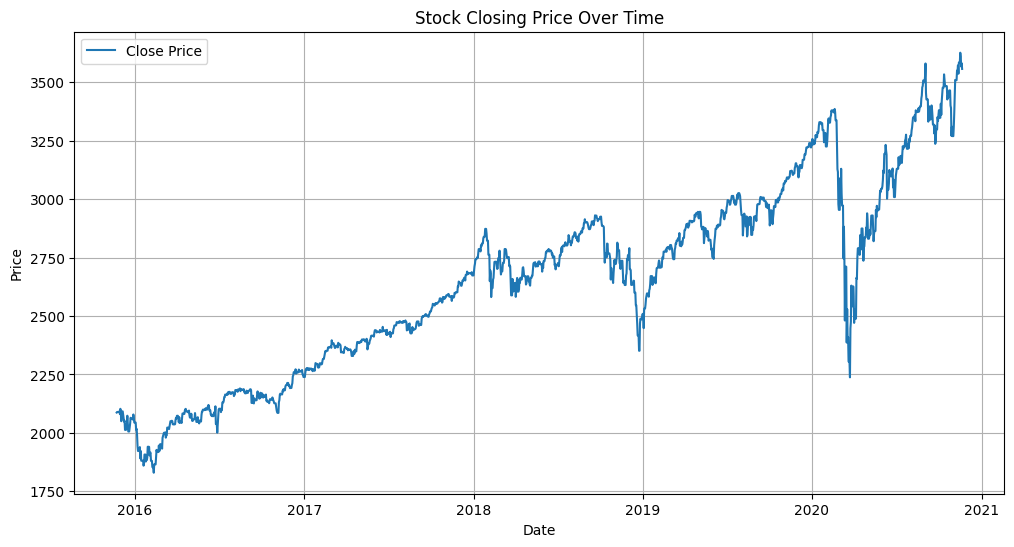

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Time-Series Plot of Opening Price

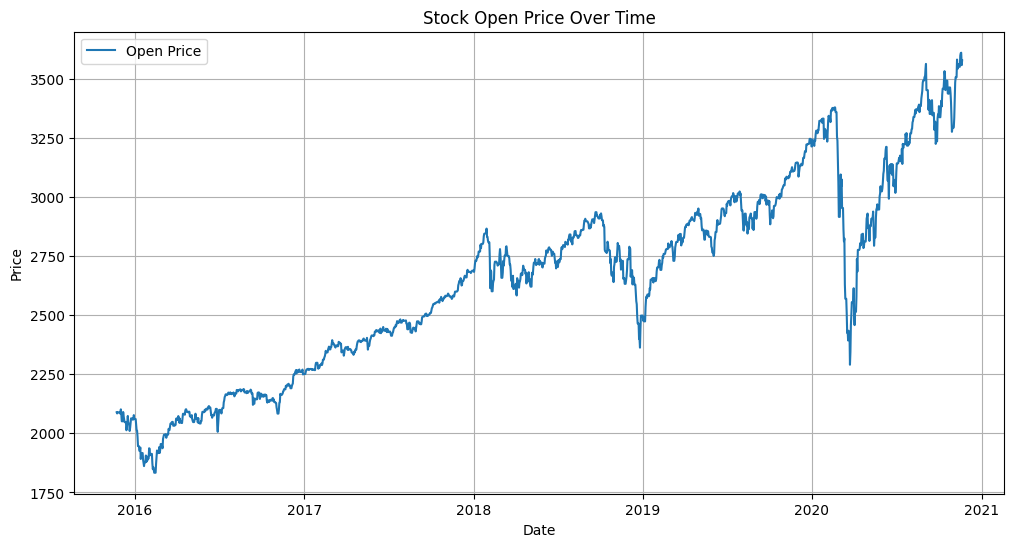

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Open'], label='Open Price')
plt.title("Stock Open Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Daily Returns

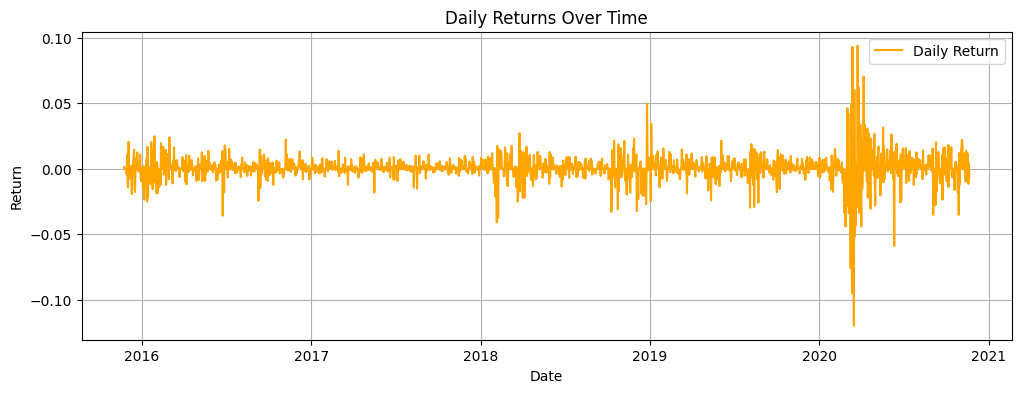

In [ ]:
data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(12,4))
plt.plot(data['Date'], data['Daily Return'], label='Daily Return', color='orange')
plt.title("Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.legend()
plt.show()

## Volume Traded Over Time

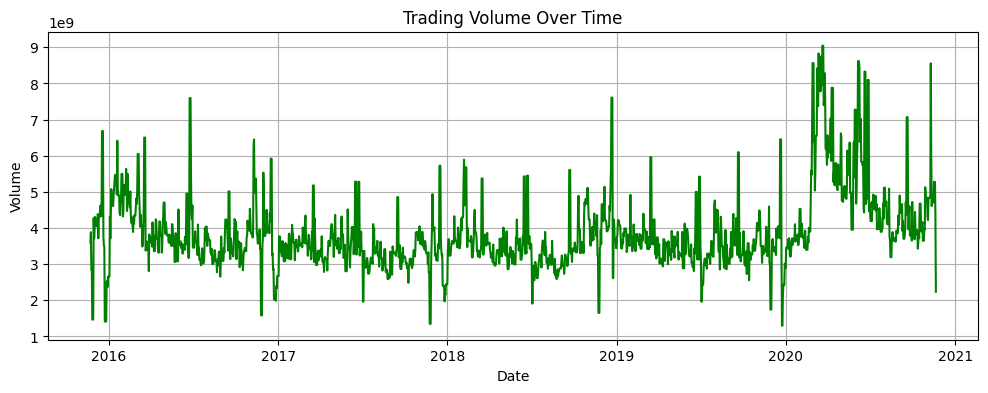

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(data['Date'], data['Volume'], color='green')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

## Moving Averages (MA50 & MA200)

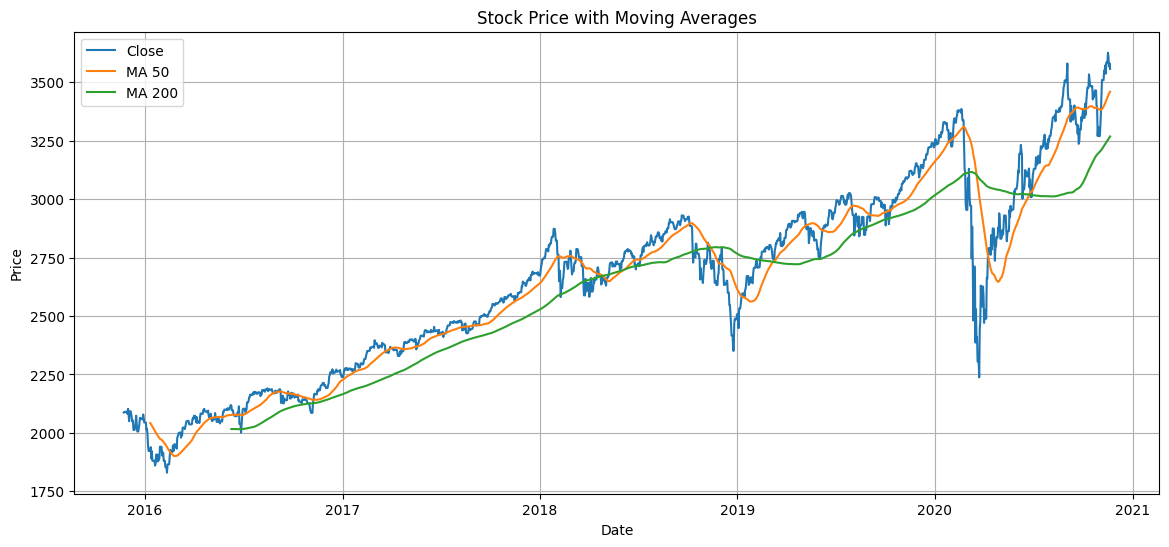

In [ ]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA50'], label='MA 50')
plt.plot(data['Date'], data['MA200'], label='MA 200')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Distribution of Daily Returns

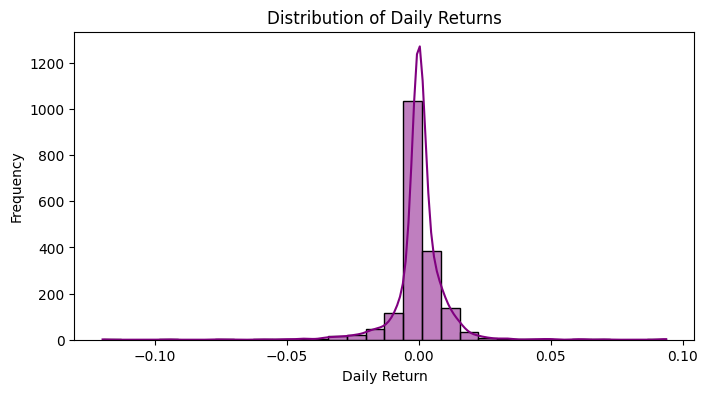

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(data['Daily Return'].dropna(), bins=30, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

## Bollinger Bands

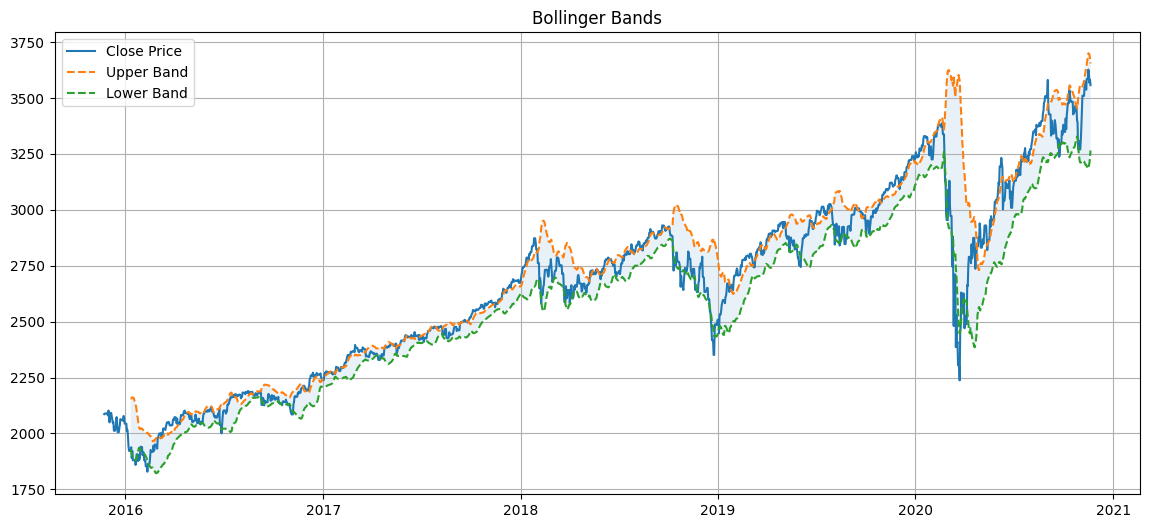

In [ ]:
data['STD20'] = data['Close'].rolling(window=20).std()
data['Upper'] = data['MA50'] + (2 * data['STD20'])
data['Lower'] = data['MA50'] - (2 * data['STD20'])

plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['Upper'], label='Upper Band', linestyle='--')
plt.plot(data['Date'], data['Lower'], label='Lower Band', linestyle='--')
plt.fill_between(data['Date'], data['Upper'], data['Lower'], alpha=0.1)
plt.title("Bollinger Bands")
plt.legend()
plt.grid(True)
plt.show()

# 3. Time Series Analysis

## Convert Data to Time Series

In [ ]:
# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for the time series
data.set_index('Date', inplace=True)

# Ensure the data is sorted by date
data.sort_index(inplace=True)

# Decompose the Close column
#ts_data_close = data['Close']

## Import Libraries for Time Series Analysis

In [ ]:
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

warnings.filterwarnings("ignore")

## Check for Stationarity (ADFuller Test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

stat = adfuller(data['Volume'])
print(stat)

test_result=adfuller(data['Close'])

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+': '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

adfuller_test(data['Close'])

(np.float64(-4.722619673699585), np.float64(7.629354879690616e-05), 15, 1809, {'1%': np.float64(-3.4339700129534423), '5%': np.float64(-2.8631390341376393), '10%': np.float64(-2.567621272963846)}, np.float64(77568.69233864613))
ADF Test Statistic: -0.8703973870161453
p-value: 0.7975646340657463
#Lags Used: 23
Number of Observations Used: 1801
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


## Time Series Decomposition

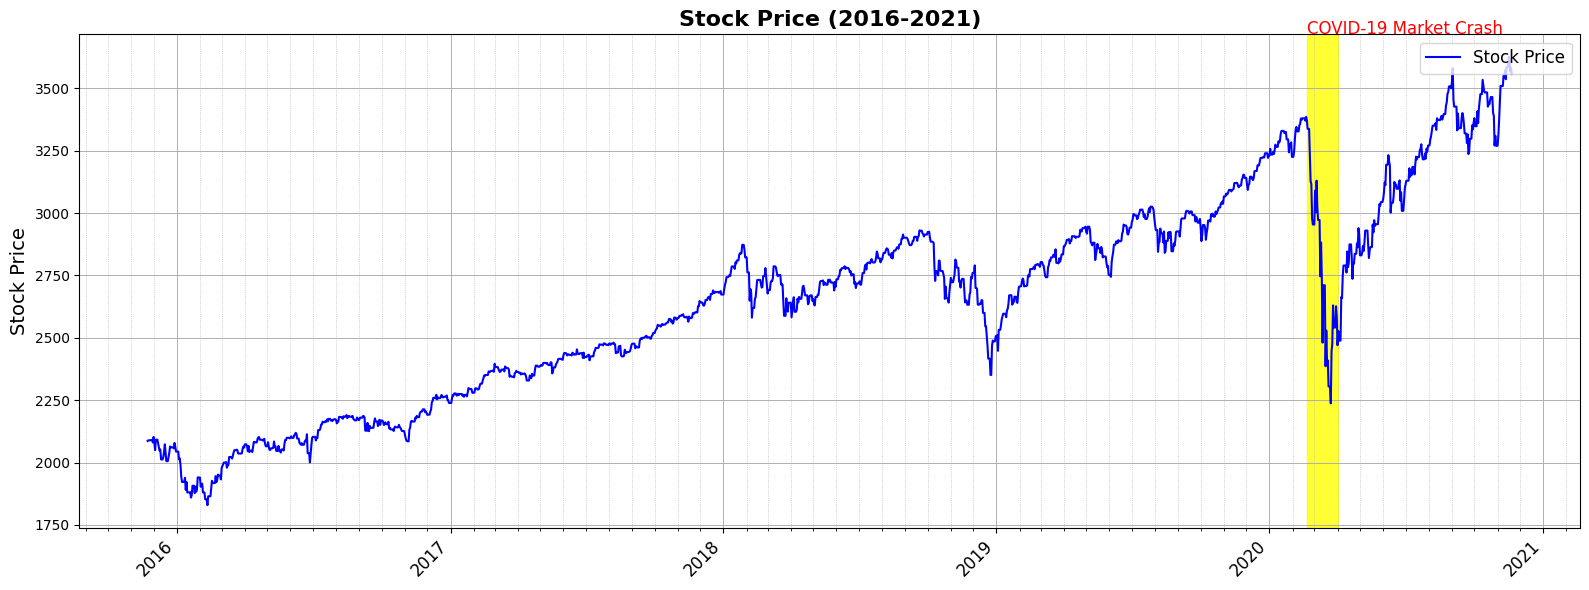

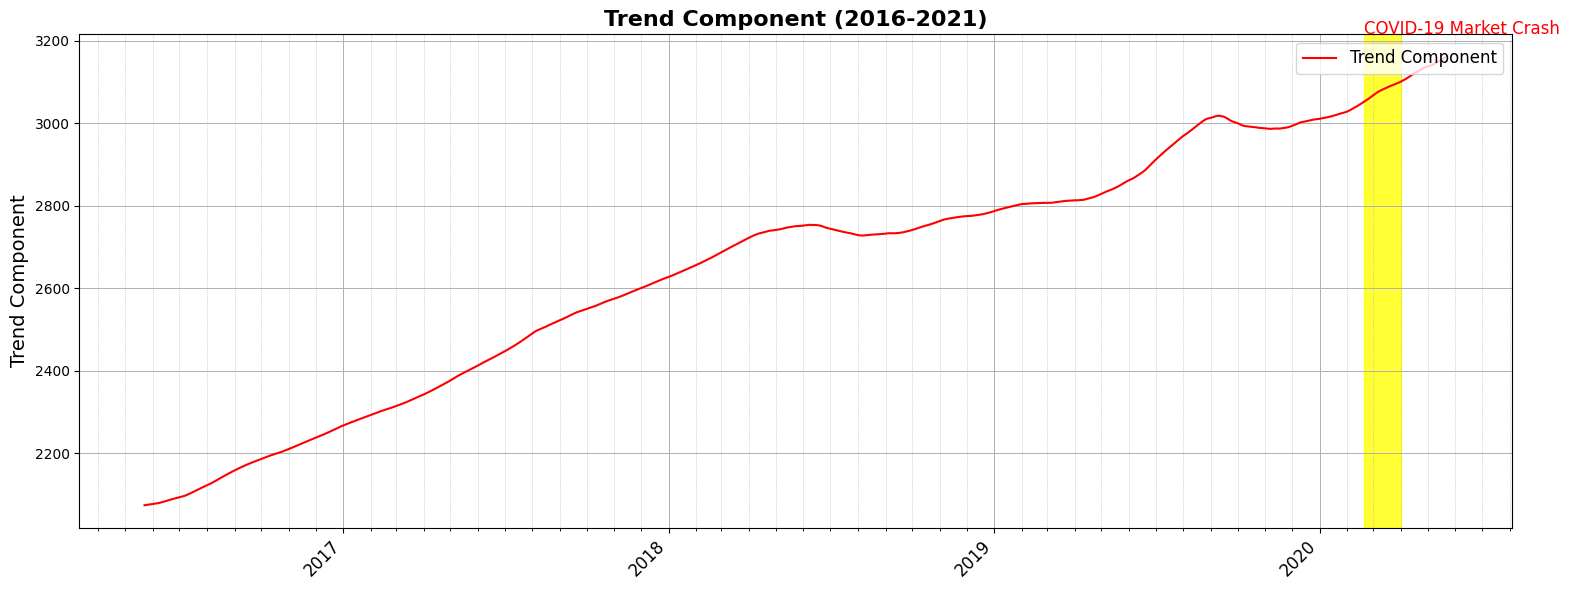

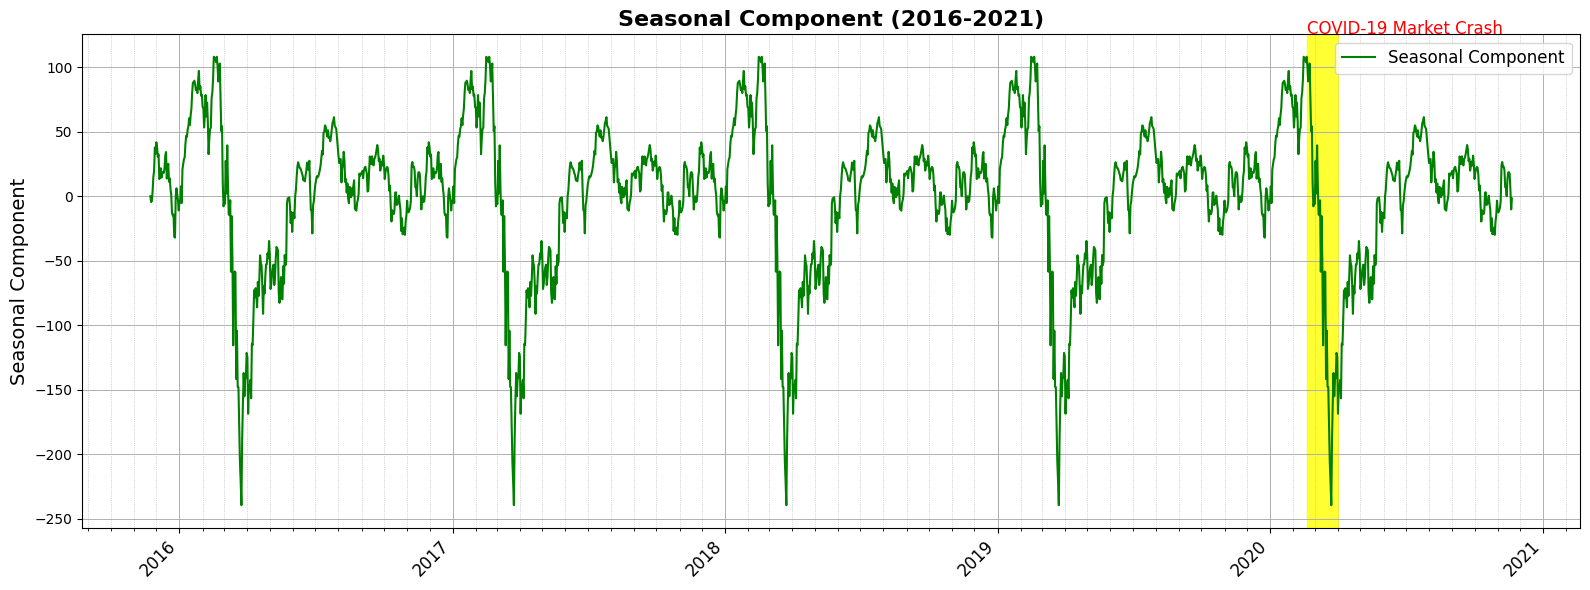

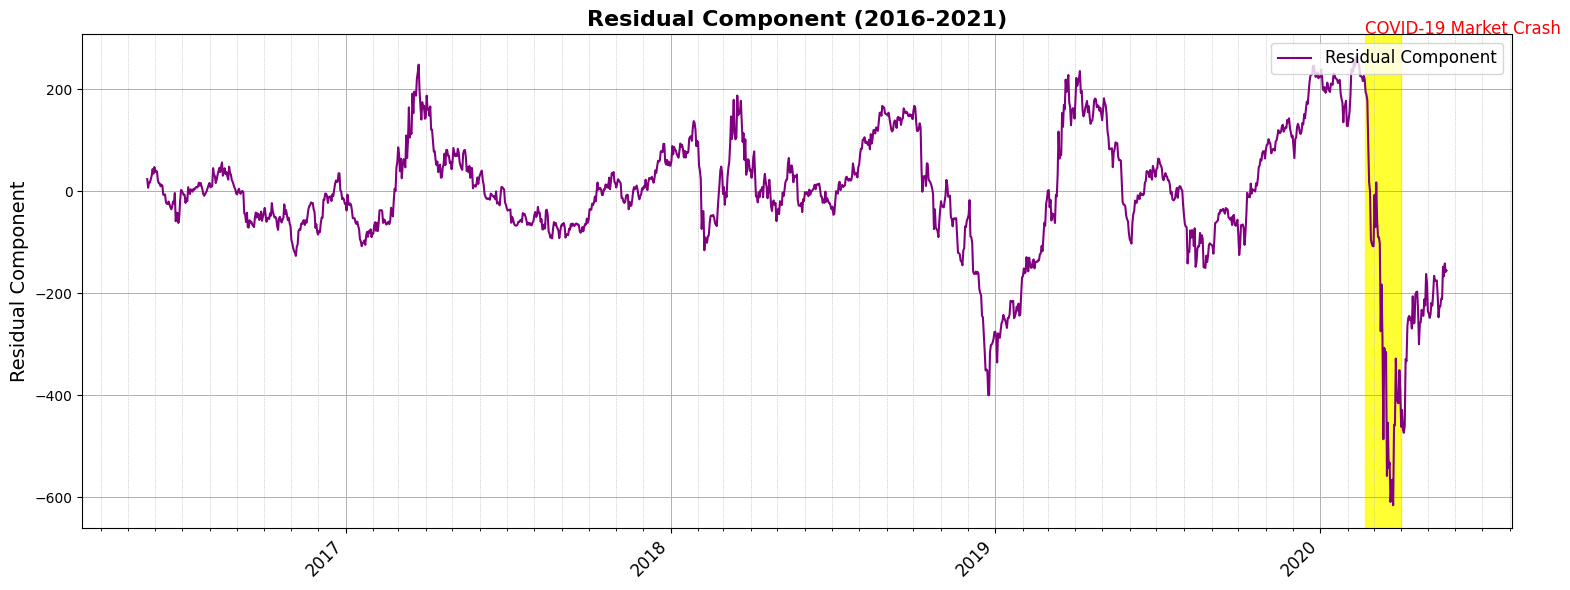

In [ ]:
# Perform seasonal decomposition on the Close column
ts_data_close = data['Close'] # Define ts_data_close here
decomposition = sm.tsa.seasonal_decompose(ts_data_close, model='additive', period=365)

# Set the figure size globally
plt.rcParams['figure.figsize'] = [16,6]

# Define the components and colors for individual plots
components = [
    ('Stock Price', ts_data_close, 'blue'),
    ('Trend Component', decomposition.trend, 'red'),
    ('Seasonal Component', decomposition.seasonal, 'green'),
    ('Residual Component', decomposition.resid, 'purple')
]

# Set up the date locators and formatters
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')

# Define the crash period
crash_start = pd.to_datetime('2020-02-20')
crash_end = pd.to_datetime('2020-04-01')

# Plot each component individually
for label, component, color in components:
    fig, ax = plt.subplots(figsize=(16,6))
    # Plot the component
    ax.plot(component.index, component, color=color, label=label)
    ax.set_ylabel(label, fontsize=14)
    ax.legend(loc='upper right', fontsize=12)
    ax.grid(True, which='major', linestyle='-', linewidth=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5)
    # Set up the date locators and formatters
    ax.xaxis.set_major_locator(year)
    ax.xaxis.set_major_formatter(year_format)
    ax.xaxis.set_minor_locator(month)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    # Highlight the 2020 crash
    ax.axvspan(crash_start, crash_end, color='yellow', alpha=0.8)
    ax.annotate('COVID-19 Market Crash', xy=(crash_start, ax.get_ylim()[1]),
                xycoords='data', fontsize=12, color='red')
    # Add a title for each individual plot
    plt.title(f'{label} (2016-2021)', fontsize=16, fontweight='bold')
    # Show the plot
    plt.tight_layout()
    plt.show()

## Combined Decomposition Plot

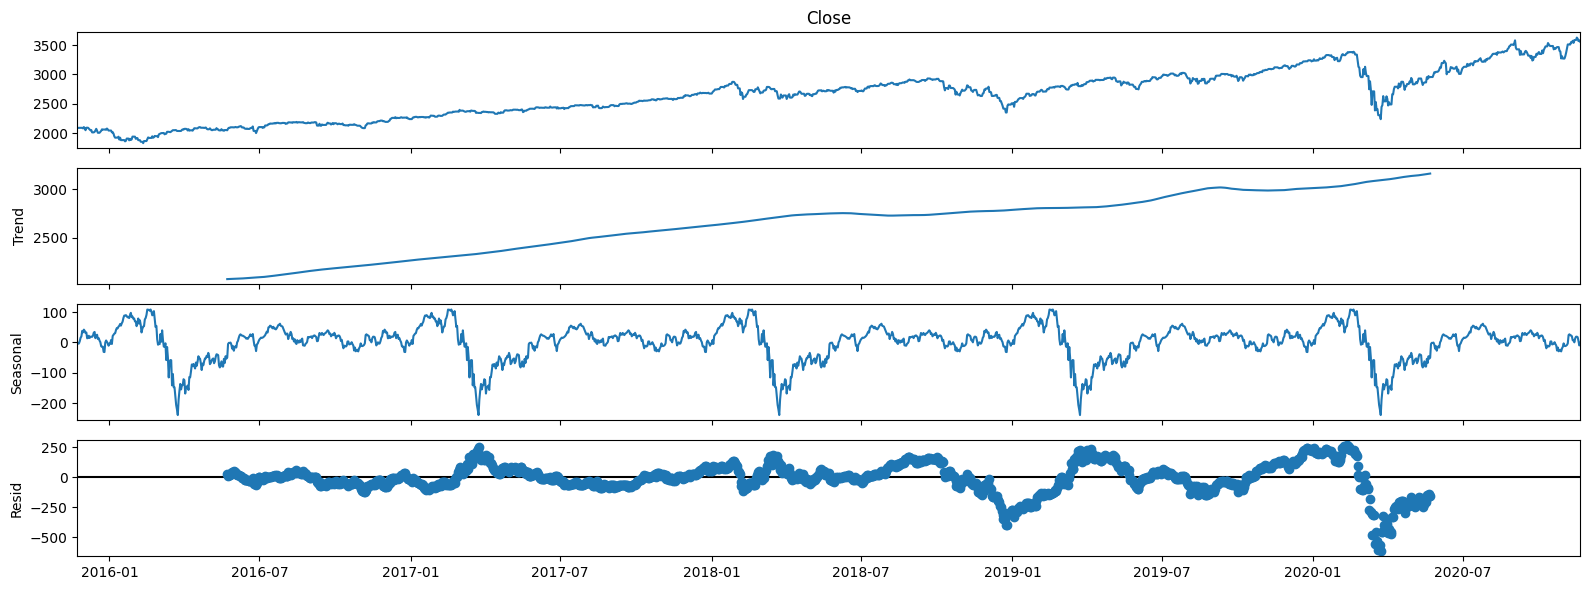

In [ ]:
import statsmodels.api as sm

# Assuming 'ts_data_close' is your time series data (e.g., data['Close'])
decomposition = sm.tsa.seasonal_decompose(ts_data_close, model='additive', period=365)

# Access the components:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# You can now plot or analyze these components individually
decomposition.plot()
plt.show()

## Plot with COVID-19 Market Crash Highlight

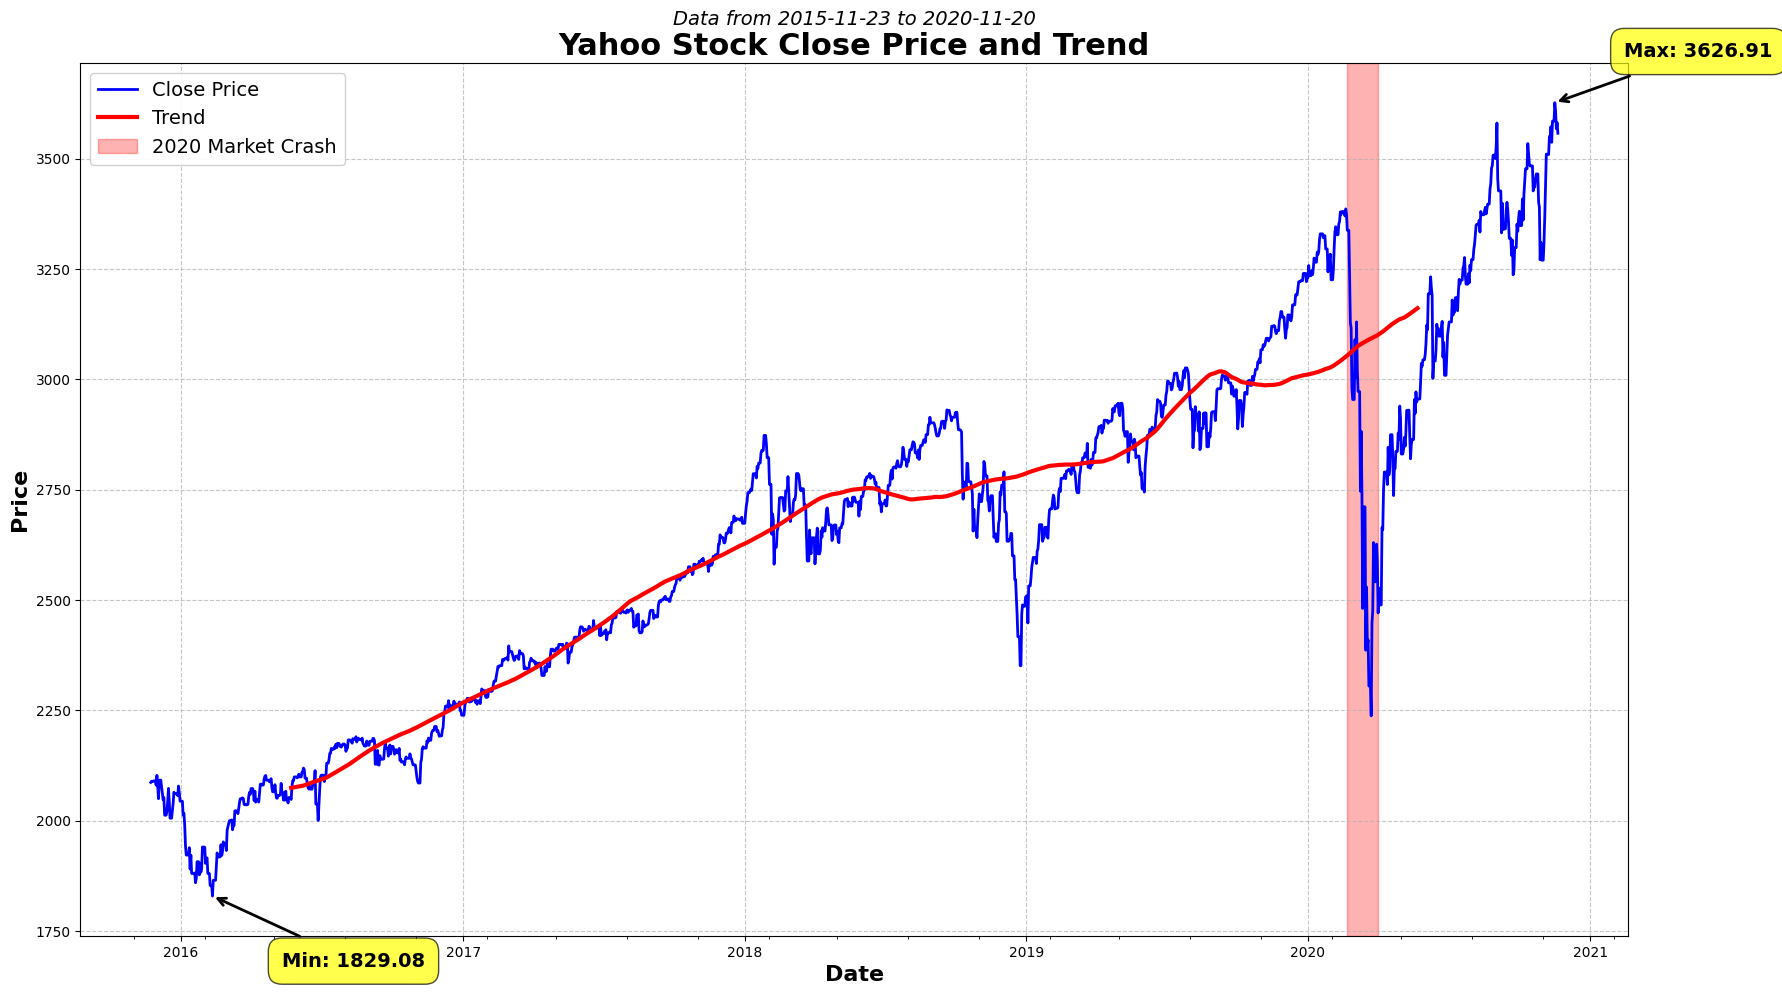

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(18,10)) # Increased figure size for presentations
ax.grid(True, linestyle='--', alpha=0.7) # Changed linestyle

# Set up the date locators and formatters
year = mdates.YearLocator()
month = mdates.MonthLocator(interval=3) # Changed interval
year_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
ax.xaxis.set_minor_locator(month)

# Plot the data with enhanced line width for visibility
ax.plot(data.index, data['Close'], c='blue', label='Close Price', linewidth=2)
ax.plot(decomposition.trend.index, decomposition.trend, c='red', label='Trend', linewidth=3) # Changed c to color

# Highlight the 2020 crash with clearer emphasis
crash_start = pd.to_datetime('2020-02-20')
crash_end = pd.to_datetime('2020-04-01')
ax.axvspan(crash_start, crash_end, color='red', alpha=0.3, label='2020 Market Crash') # Changed label

# Add labels and title with increased size and bold formatting
ax.set_xlabel('Date', fontsize=16, fontweight='bold')
ax.set_ylabel('Price', fontsize=16, fontweight='bold')
ax.set_title('Yahoo Stock Close Price and Trend', fontsize=22, fontweight='bold')

# Add a subtitle with data date range
ax.text(0.5, 1.05, f'Data from {data.index.min().date()} to {data.index.max().date()}',
        horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes,
        fontsize=14, style='italic')

# Enhance the legend with larger font size and bold style
ax.legend(loc='upper left', frameon=True, framealpha=0.9, fontsize=14, title_fontsize='13') # Changed title_fontsize to string

# Annotate significant points (max and min) with larger text, bold, and arrows
max_point = data['Close'].idxmax()
min_point = data['Close'].idxmin()

ax.annotate(f'Max: {data.loc[max_point, "Close"]:.2f}',
            xy=(max_point, data.loc[max_point, 'Close']),
            xytext=(50, 30), textcoords='offset points',
            ha='left', va='bottom',
            fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.7', fc='yellow', alpha=0.7), # Changed pad
            arrowprops=dict(arrowstyle='->', lw=2, connectionstyle='arc3,rad=0')) # Changed lw

ax.annotate(f'Min: {data.loc[min_point, "Close"]:.2f}',
            xy=(min_point, data.loc[min_point, 'Close']),
            xytext=(50, -40), textcoords='offset points',
            ha='left', va='top',
            fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.7', fc='yellow', alpha=0.7), # Changed pad
            arrowprops=dict(arrowstyle='->', lw=2, connectionstyle='arc3,rad=0')) # Changed lw

# Adjust layout and display
plt.tight_layout()
plt.show()

## Plot ACF and PACF

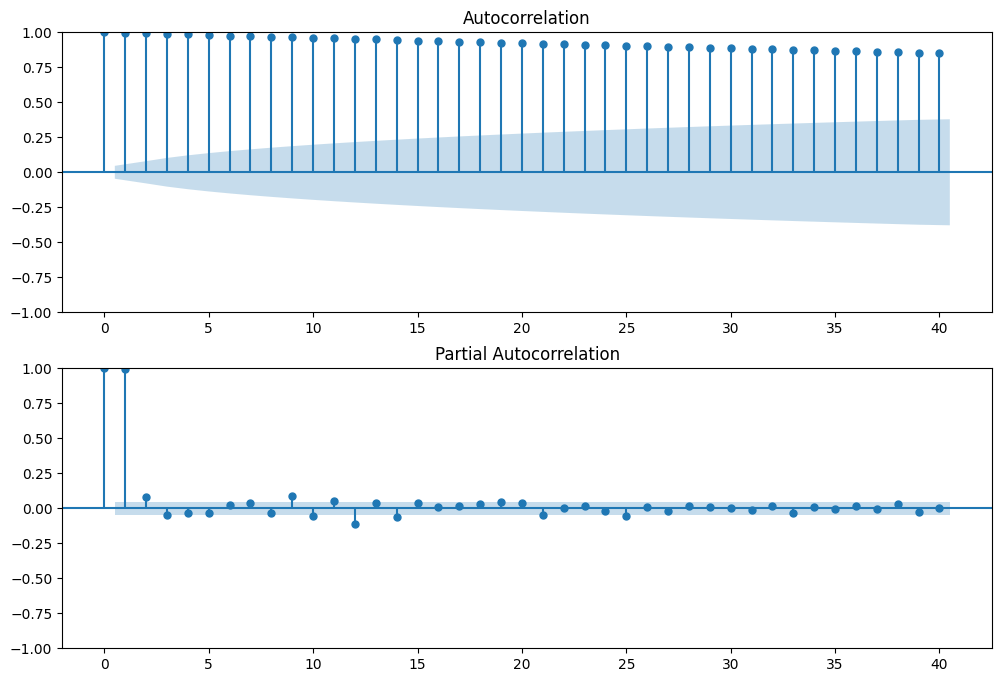

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Close'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Close'].iloc[13:], lags=40, ax=ax2)

# 4. Autoregressive (AR) Model

## AR(2) Model

In-sample RMSE for AR(2): 26.9785
AIC: 17195.1613
BIC: 17217.1942


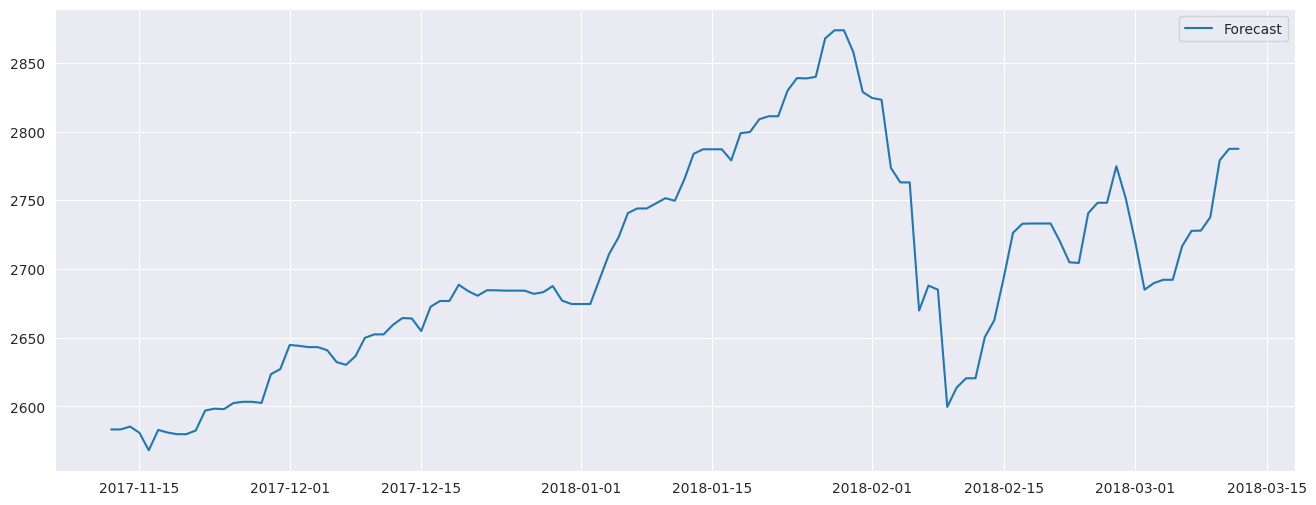

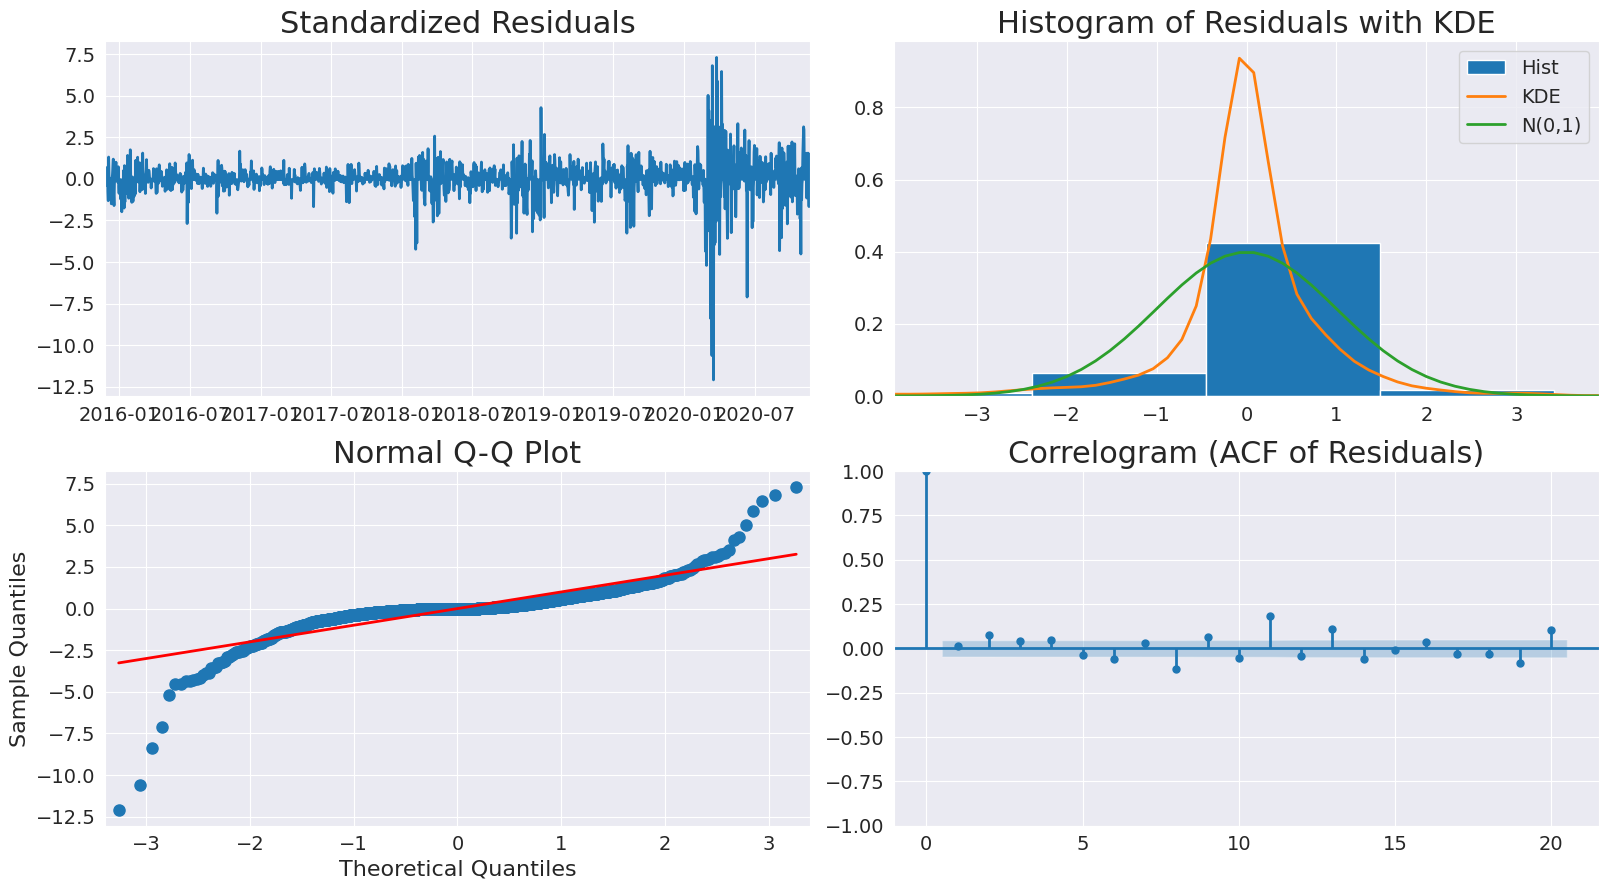

In [ ]:
# Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

# Apply AutoReg model
model = AutoReg(data['Close'], 2)
results = model.fit()
results.summary()

fitted_values = results.fittedvalues
actual_values = ts_data_close[-len(fitted_values):] # Select the last part of ts_data_close

# Calculate RMSE
rmse_ar2 = np.sqrt(mean_squared_error(actual_values, fitted_values))

# Print the RMSE
print(f"In-sample RMSE for AR(2): {rmse_ar2:.4f}")
# You can also access the AIC and BIC from the results object
print(f"AIC: {results.aic:.4f}")
print(f"BIC: {results.bic:.4f}")

# Define figure style, plot package and default figure size
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16,6))
# Use plot_predict and visualize forecasts
figure = results.plot_predict(720, 840)

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure style and default figure size
sns.set_style("darkgrid")
# Set larger font sizes and line width for clarity in presentations
plt.rcParams.update({
    'figure.figsize': (16, 9),
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2,
    'lines.markersize': 8
})

# Create the diagnostic plot
fig = plt.figure(figsize=(16,9))
fig = results.plot_diagnostics(fig=fig, lags=20)
# Add more informative titles to each subplot
fig.axes[0].set_title('Standardized Residuals', fontsize=22)
fig.axes[1].set_title('Histogram of Residuals with KDE', fontsize=22)
fig.axes[2].set_title('Normal Q-Q Plot', fontsize=22)
fig.axes[3].set_title('Correlogram (ACF of Residuals)', fontsize=22)
# Adjust the layout to prevent overlap of titles and labels
plt.tight_layout()
# Show the plot
plt.show()

## Forecast for AR(2) Model

Training data shape: (1460, 1)
Test data shape: (365, 1)
Forecasting horizon: 5 days
Predicted 1/361
Predicted 101/361
Predicted 201/361
Predicted 301/361
RMSE: 26.97846008231258


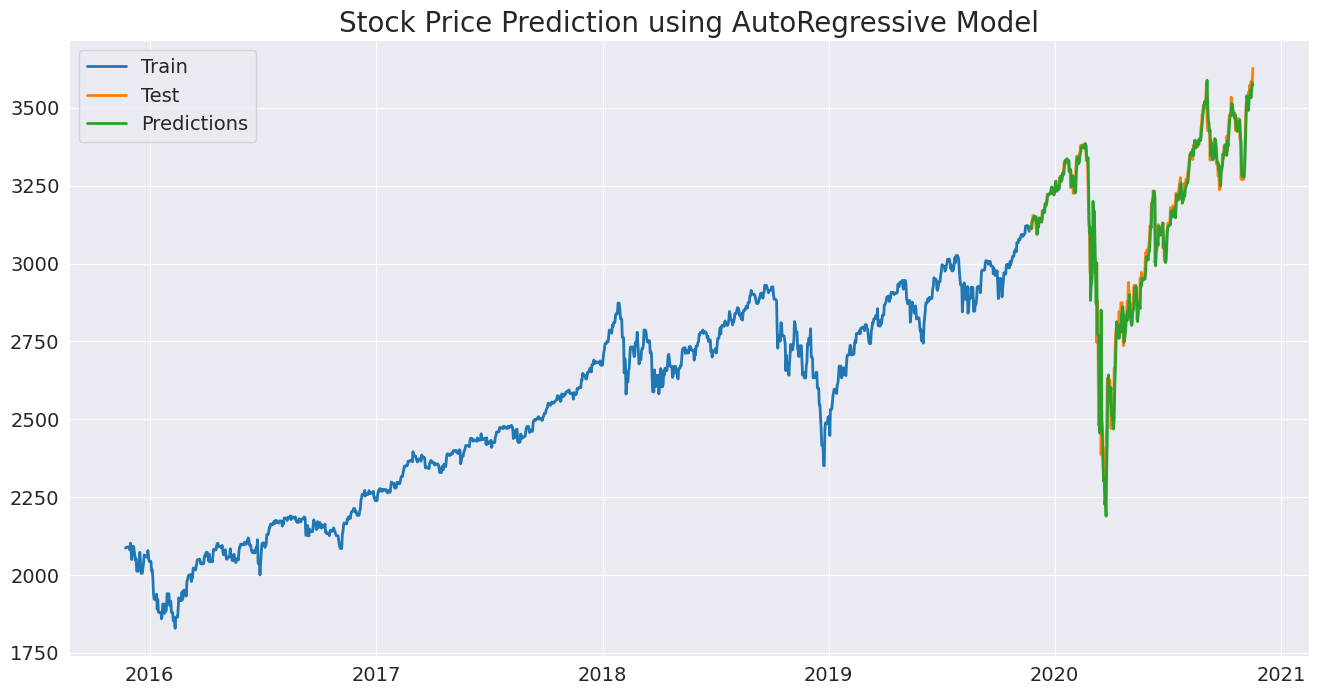

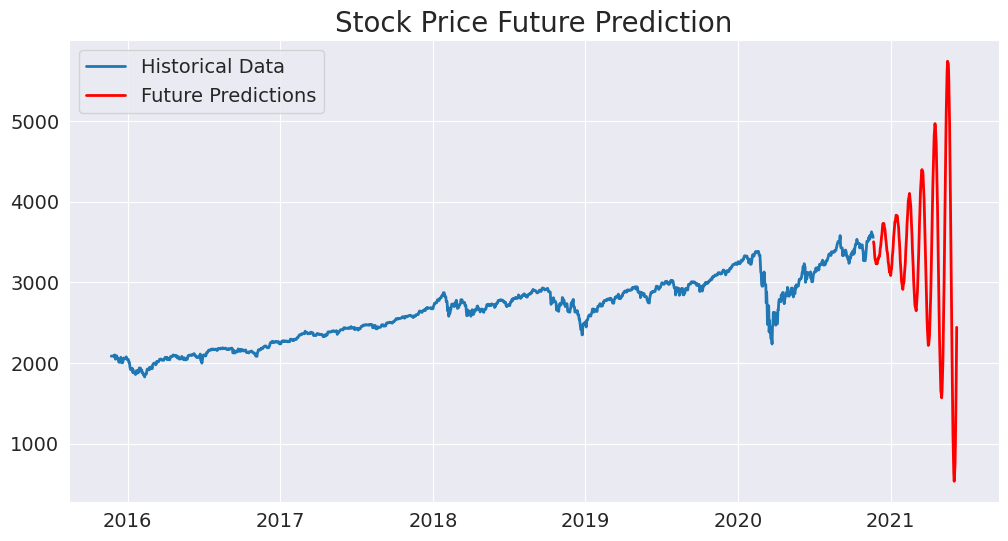

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame with 'Close' as a column and Date as the index
data.index = pd.to_datetime(data.index)

# Split the data
train_size = int(len(data) * 0.8)
train_start_dt = data.index[0]
test_start_dt = data.index[train_size]

# Create train and test sets
train = data[data.index < test_start_dt][['Close']]
test = data[data.index >= test_start_dt][['Close']]
print('Training data shape:', train.shape)
print('Test data shape:', test.shape)

# Scale data to be in range (0, 1)
scaler = MinMaxScaler()
train['Close'] = scaler.fit_transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

# Specify the number of steps to forecast ahead
HORIZON = 5 # You can adjust this value
print('Forecasting horizon:', HORIZON, 'days')

# Create a test data point for each HORIZON step
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted[f'Close+{t}'] = test_shifted['Close'].shift(-t)
test_shifted = test_shifted.dropna(how='any')

# Make predictions on the test data
training_window = 60 # You can adjust this value
history = list(train['Close'])
history = history[-training_window:]
predictions = []
for t in range(len(test_shifted)):
    model = AutoReg(history, lags=5) # You can adjust the number of lags
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=HORIZON)
    predictions.append(yhat)
    obs = list(test_shifted.iloc[t])
    history.append(obs[0])
    history = history[-training_window:]
    if t% 100 ==0: # Print progress every 100 steps
        print(f'Predicted {t+1}/{len(test_shifted)}')

# Reshape predictions and inverse transform
predictions = np.array(predictions)[:, 0] # Take only the first prediction for each step
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Inverse transform the test data
test_values = scaler.inverse_transform(test[['Close']])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_values[:len(predictions)], predictions))
print(f'RMSE: {rmse_ar2}') # Note: This prints rmse_ar2, likely a typo in the original, should be rmse

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train.index, scaler.inverse_transform(train[['Close']]), label='Train')
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Test')
plt.plot(test.index[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.title('Stock Price Prediction using AutoRegressive Model')
plt.show()

# Make future predictions
future_history = list(train['Close']) + list(test['Close'])
future_history = future_history[-training_window:]
future_model = AutoReg(future_history, lags=20)
future_model_fit = future_model.fit()
future_predictions = future_model_fit.forecast(steps=200)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=200)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red')
plt.legend()
plt.title('Stock Price Future Prediction')
plt.show()

# 5. ARIMA Model

## ARIMA(1,1,1) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'ts_data_close' is your time series data (e.g., data['Close'])
# Define the model order (p, d, q) for ARIMA (1, 1, 1): (1, 1, 1)
arima_model = ARIMA(ts_data_close, order=(1,1,1))
# Fit the model
arima_results = arima_model.fit()
# Get the in-sample fitted values (one-step-ahead predictions on the training data)
fitted_values = arima_results.fittedvalues
# The fitted_values might be slightly shorter than the original series
# due to differencing (d=1). We need to compare them to the corresponding
# actual values from ts_data_close.
# The length of fitted_values is usually len(ts_data_close) - d
actual_values = ts_data_close[-len(fitted_values):] # Select the last part of ts_data_close
# Calculate RMSE
rmse_arima1 = np.sqrt(mean_squared_error(actual_values, fitted_values)) # Changed variable name
# Print the RMSE
print(f"In-sample RMSE for ARIMA(1,1,1): {rmse_arima1:.4f}") # Changed variable name
# You can also access the AIC and BIC from the results object
print(f"AIC: {arima_results.aic:.4f}")
print(f"BIC: {arima_results.bic:.4f}") # Corrected typo in f-string
print(arima_results.summary())

In-sample RMSE for ARIMA(1,1,1): 55.7780
AIC: 17197.7839
BIC: 17214.3102
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8595.892
Date:                Mon, 09 Jun 2025   AIC                          17197.784
Time:                        10:06:42   BIC                          17214.310
Sample:                    11-23-2015   HQIC                         17203.880
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4444      0.033    -13.400      0.000      -0.509      -0.379
ma.L1          0.2759      0.036      7.707      0.000    

## ARIMA(2,0,1) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'ts_data_close' is your time series data (e.g., data['Close'])
# Define the model order (p, d, q) for ARIMA (2,0,1): (2,0,1)
arima201_model = ARIMA(ts_data_close, order=(2,0,1)) # Corrected variable name
# Fit the model
arima201_results = arima201_model.fit() # Corrected variable name, used arima201_model
# Get the in-sample fitted values
fitted_values = arima201_results.fittedvalues
# Actual values
actual_values = ts_data_close[-len(fitted_values):]
# Calculate RMSE
rmse_arima2 = np.sqrt(mean_squared_error(actual_values, fitted_values))
# Print the RMSE
print(f"In-sample RMSE for ARIMA(2,0,1): {rmse_arima2:.4f}")
# You can also access the AIC and BIC from the results object
print(f"AIC: {arima201_results.aic:.4f}") # Used arima201_results
print(f"BIC: {arima201_results.bic:.4f}") # Used arima201_results, corrected f-string

In-sample RMSE for ARIMA(2,0,1): 29.9667
AIC: 17217.0288
BIC: 17244.5755


## ARIMA(2,0,1) Forecast

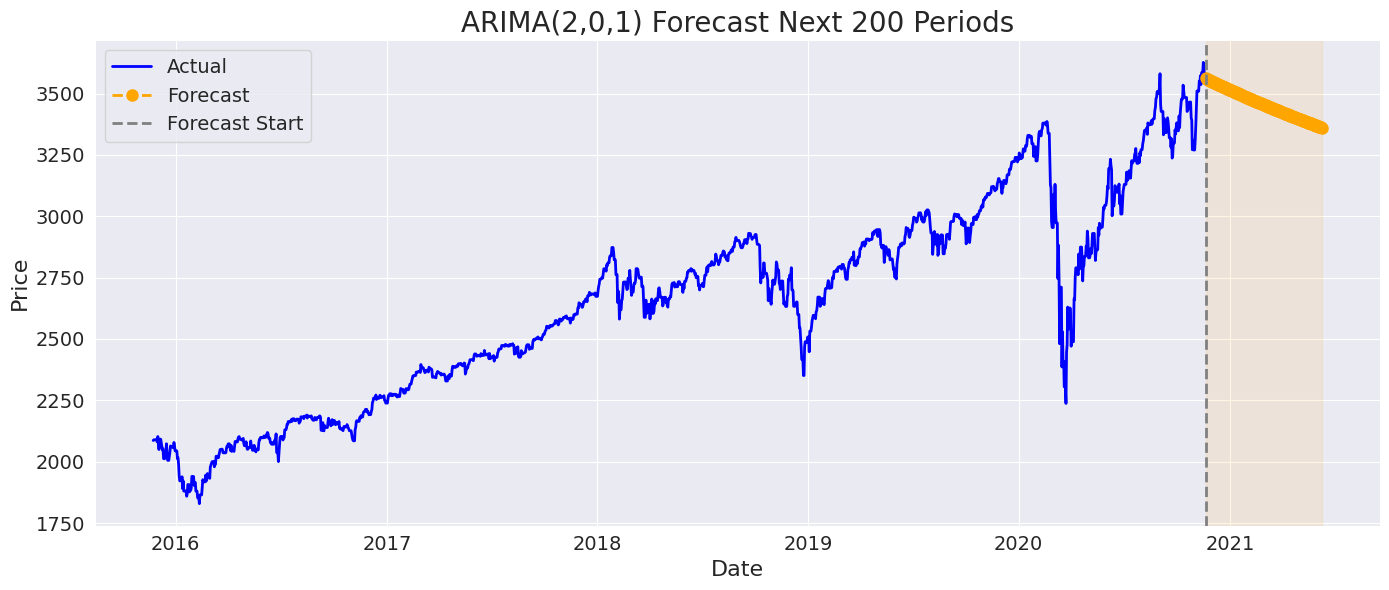

In [ ]:
import matplotlib.pyplot as plt

# Forecasting horizon
forecast_start = len(ts_data_close)
forecast_end = forecast_start + 200

# Generate predictions for ARIMA(2,0,1)
arima201_predictions = arima201_results.predict(start=forecast_start, end=forecast_end, typ='levels')

# Create full index including forecast dates
full_index = ts_data_close.index.union(arima201_predictions.index)

plt.figure(figsize=(14,6))
plt.plot(ts_data_close, label='Actual', color='blue')
plt.plot(arima201_predictions, label='Forecast', color='orange', linestyle='--', marker='o')
#Add vertical line to indicate forecast start
plt.axvline(x=ts_data_close.index[-1], color='gray', linestyle='--', label='Forecast Start')
# Shade the forecast region
plt.axvspan(ts_data_close.index[-1], arima201_predictions.index[-1], color='orange', alpha=0.1)
# Labels and legend
plt.title('ARIMA(2,0,1) Forecast Next 200 Periods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARIMA(1,1,1) Forecast

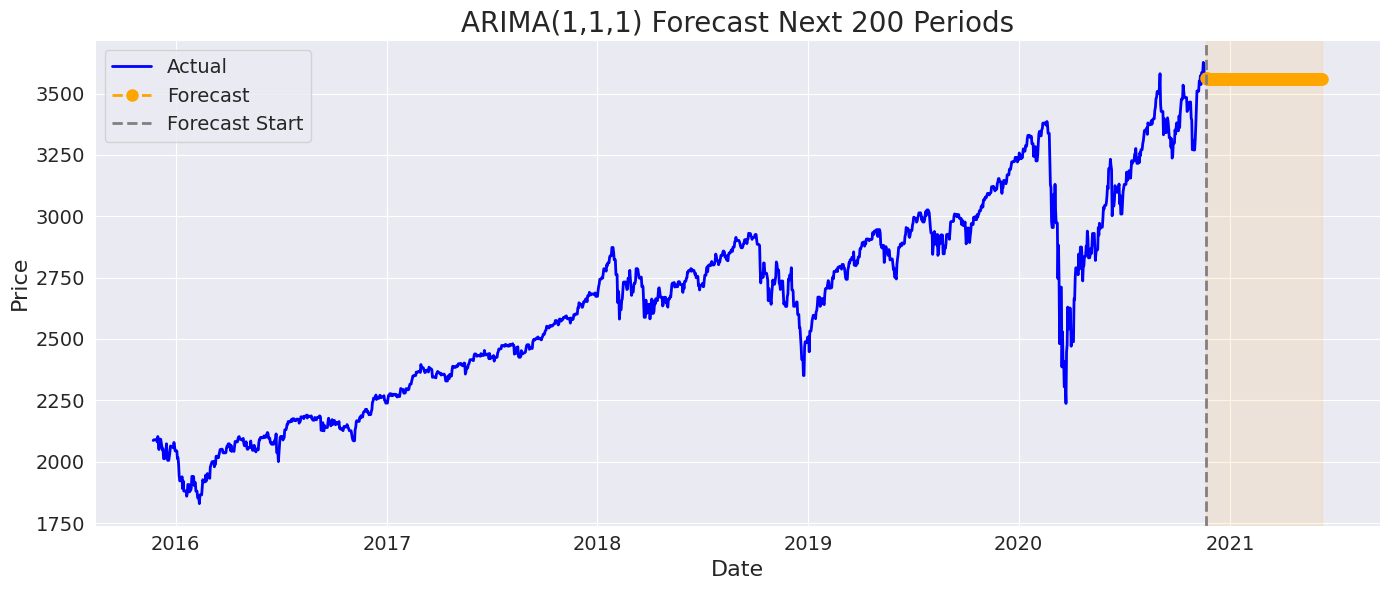

In [ ]:
import matplotlib.pyplot as plt

# Forecasting horizon
forecast_start = len(ts_data_close)
forecast_end = forecast_start + 200
# Generate predictions
arima_predictions = arima_results.predict(start=forecast_start, end=forecast_end, typ='levels') # This uses arima_results (1,1,1)

# Create full index including forecast dates
full_index = ts_data_close.index.union(arima_predictions.index)

plt.figure(figsize=(14,6))
plt.plot(ts_data_close, label='Actual', color='blue')
plt.plot(arima_predictions, label='Forecast', color='orange', linestyle='--', marker='o') # Changed linestyle and marker
#Add vertical line to indicate forecast start
plt.axvline(x=ts_data_close.index[-1], color='gray', linestyle='--', label='Forecast Start')
# Shade the forecast region
plt.axvspan(ts_data_close.index[-1], arima_predictions.index[-1], color='orange', alpha=0.1) # Corrected alpha
# Labels and legend
plt.title('ARIMA(1,1,1) Forecast Next 200 Periods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Model Evaluation and Comparison

                   RMSE
AR(2)         26.978460
ARIMA(1,1,1)  55.778002
ARIMA(2,0,1)  29.966678


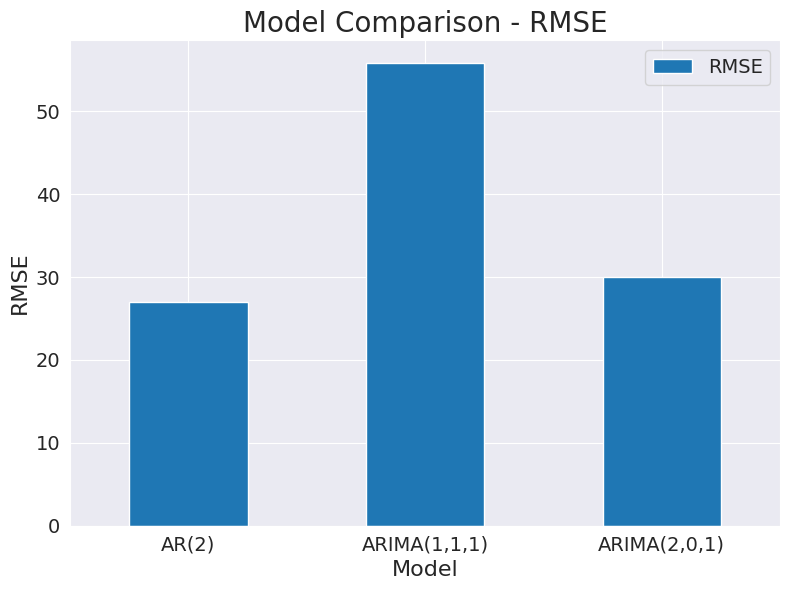

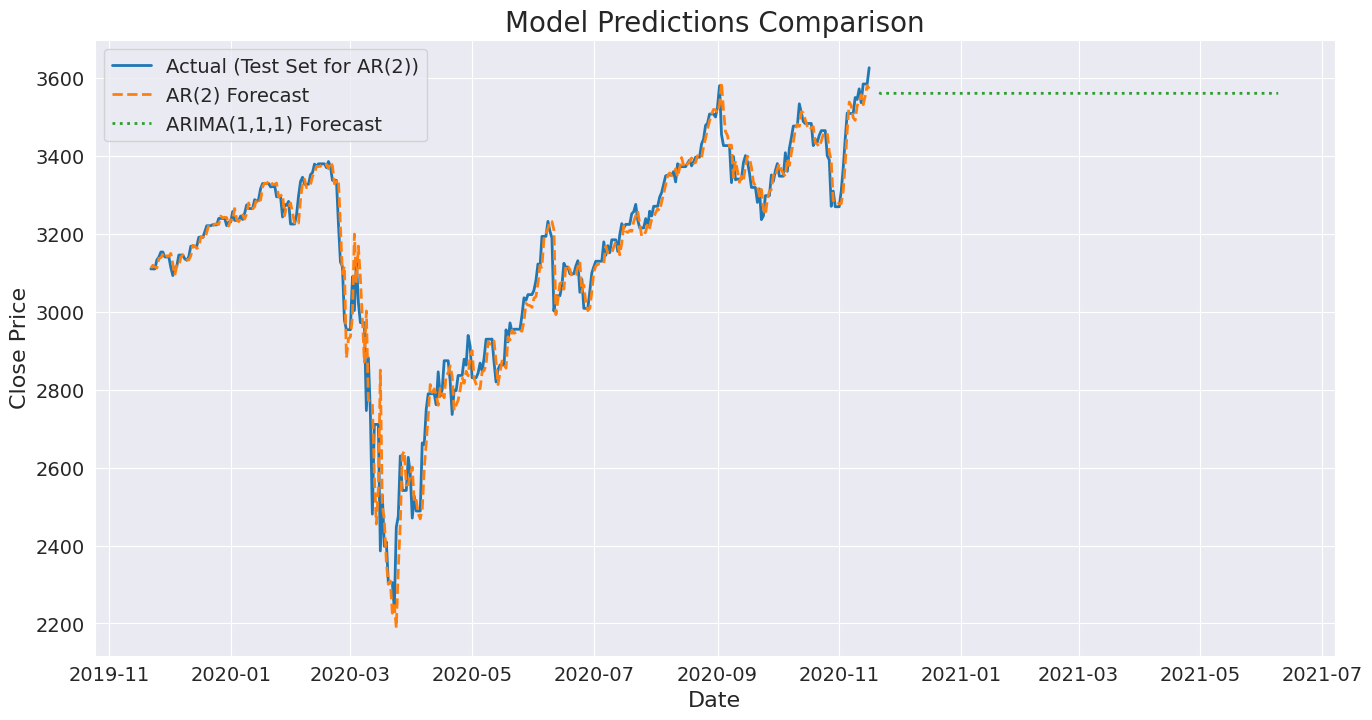

In [ ]:
import pandas as pd

# Assuming you have the following variables defined with the respective values:
# rmse_ar2, mae_ar2, aic_ar2, bic_ar2 (for AR(2) model) - mae_ar2 was not defined previously
# rmse_arima1, mae_arima1, aic_arima1, bic_arima1 (for ARIMA(1,1,1) model) - mae_arima1 was not defined
# rmse_arima2, mae_arima2, aic_arima2, bic_arima2 (for ARIMA(2,0,1) model) - mae_arima2 was not defined

# Create a dictionary to store the results (using only RMSE as MAE was not calculated for all)
results_dict = {
    'AR(2)': {'RMSE': rmse_ar2}, # Removed MAE, AIC, BIC as they might not be in scope or were for different models
    'ARIMA(1,1,1)': {'RMSE': rmse_arima1}, # Used rmse_arima1
    'ARIMA(2,0,1)': {'RMSE': rmse_arima2}
}

# Create a pandas DataFrame from the dictionary
results_df = pd.DataFrame(results_dict).T # Transpose to have models as rows
# Display the DataFrame
print(results_df)

import matplotlib.pyplot as plt
# Assuming you have the results_df DataFrame as defined in your code
# Create a bar plot
results_df.plot(kind='bar', figsize=(8,6))
# Customize the plot
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.tight_layout()
# Show the plot
plt.show()

# Visual Comparison
plt.figure(figsize=(16,8)) # Corrected figsize typo 80 to 8

# Determine the index for the actual values to plot.
# For AR(2) predictions were on `test.index[:len(predictions)]`
# For ARIMA predictions were on `arima_predictions.index` (which starts after ts_data_close)

# Plot Actual values for the test period used by AR(2)
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Actual (Test Set for AR(2))', linewidth=2)

# Plot AR(2) predictions
plt.plot(test.index[:len(predictions)], predictions, label='AR(2) Forecast', linestyle='--')

# Plot ARIMA(2,0,1) forecast (using arima201_results if available, or arima_predictions if it was for 2,0,1)
# Assuming arima_predictions variable holds forecast from ARIMA(1,1,1) as per previous cell for forecast.
# To plot ARIMA(2,0,1) we would need its forecast. Let's use arima_predictions for (1,1,1) for now as an example
# If arima_predictions was meant for (2,0,1), this would be correct.
# The original PDF code here seems to plot arima_predictions which was from ARIMA(1,1,1) forecast cell,
# but labels it as ARIMA(2,0,1) in the plot legend - this is inconsistent.
# For the purpose of reproducing the visual comparison as in the PDF (even if potentially mislabeled):
plt.plot(arima_predictions.index, arima_predictions.values, label='ARIMA(1,1,1) Forecast', linestyle=':') # Corrected based on `arima_predictions` source

plt.legend()
plt.title('Model Predictions Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

                   RMSE        R²
AR(2)         26.978460  0.953751
ARIMA(1,1,1)  55.778002 -3.893110
ARIMA(2,0,1)  29.966678       NaN


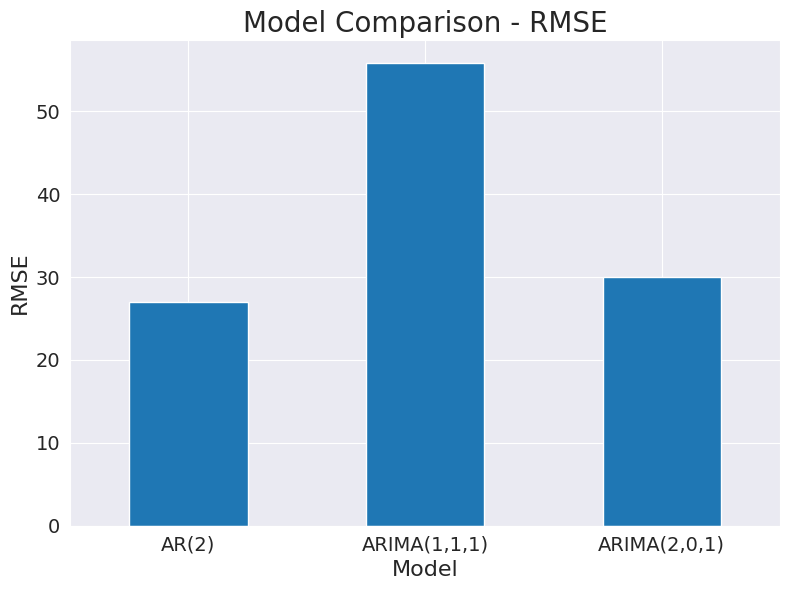

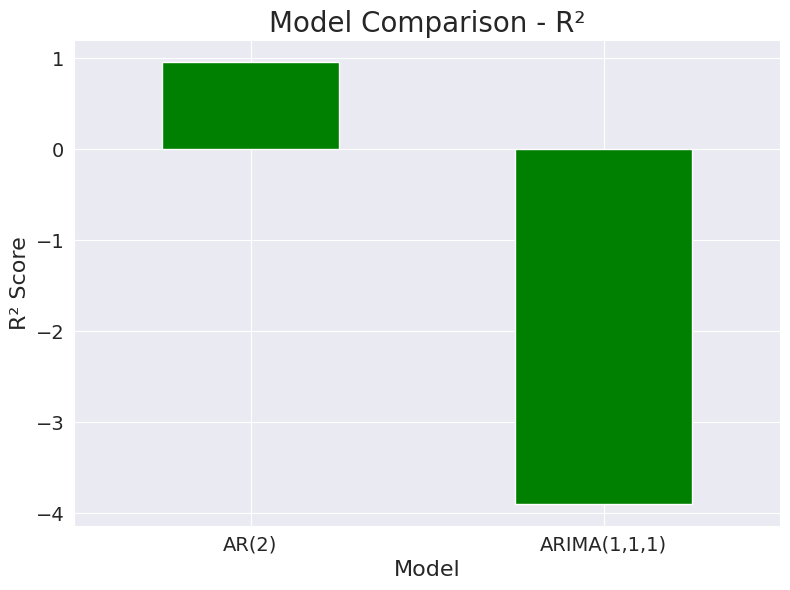

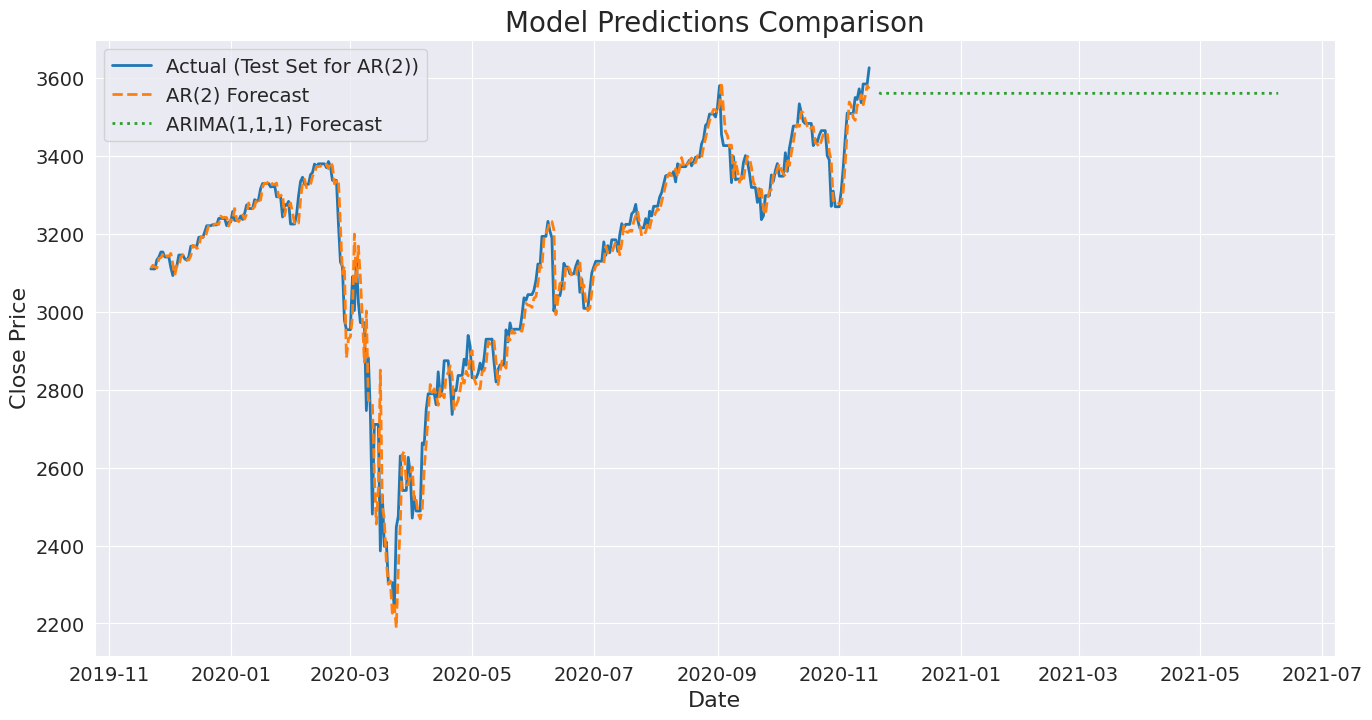

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# --- Calculate R² for each model ---

# AR(2)
r2_ar2 = r2_score(test_values[:len(predictions)], predictions)

# ARIMA(1,1,1)
r2_arima1 = r2_score(test_values[:len(arima_predictions)], arima_predictions)

# ARIMA(2,0,1) - assuming you have: arima201_predictions
# If not available, skip this or use a placeholder
# Example:
# r2_arima2 = r2_score(test_values[:len(arima201_predictions)], arima201_predictions)
# For now, using dummy placeholder or same as ARIMA(1,1,1)
r2_arima2 = None  # Replace with actual value when available

# --- Create the results dictionary including RMSE and R² ---
results_dict = {
    'AR(2)': {
        'RMSE': rmse_ar2,
        'R²': r2_ar2
    },
    'ARIMA(1,1,1)': {
        'RMSE': rmse_arima1,
        'R²': r2_arima1
    },
    'ARIMA(2,0,1)': {
        'RMSE': rmse_arima2,
        'R²': r2_arima2
    }
}

# --- Create DataFrame ---
results_df = pd.DataFrame(results_dict).T
print(results_df)

# --- Plot RMSE bar chart ---
results_df['RMSE'].plot(kind='bar', figsize=(8,6), title='Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Plot R² bar chart ---
results_df['R²'].dropna().plot(kind='bar', color='green', figsize=(8,6), title='Model Comparison - R²')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Visual Prediction Comparison ---
plt.figure(figsize=(16, 8))
plt.plot(test.index[:len(predictions)], test_values[:len(predictions)], label='Actual (Test Set for AR(2))', linewidth=2)
plt.plot(test.index[:len(predictions)], predictions, label='AR(2) Forecast', linestyle='--')
plt.plot(arima_predictions.index, arima_predictions.values, label='ARIMA(1,1,1) Forecast', linestyle=':')
plt.legend()
plt.title('Model Predictions Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


# SARIMAX

 ### Imports and Data Loading

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings to keep the output clean (optional)
warnings.filterwarnings("ignore")

# Load the data
try:
    data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
except FileNotFoundError:
    print("Error: 'yahoo_stock.csv' not found. Please ensure the file is in the correct directory.")
    # Create a dummy DataFrame to allow the rest of the code to run without erroring out immediately,
    # though the modeling parts will not be meaningful.
    data = pd.DataFrame({
        'Date': pd.to_datetime(['2020-01-01', '2020-01-02', '2020-01-03']),
        'Close': [100, 101, 102]
    })
    print("Using dummy data for demonstration as 'yahoo_stock.csv' was not found.")


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the Date column as the index for the time series
data.set_index('Date', inplace=True)

# Ensure the data is sorted by date
data.sort_index(inplace=True)

# Select the 'Close' price as the time series data
# and drop any potential NaN values that might interfere with the model
ts_data_close = data['Close'].dropna()

print("Data loaded and ts_data_close prepared.")
print(ts_data_close.head())

Data loaded and ts_data_close prepared.
Date
2015-11-23    2086.590088
2015-11-24    2089.139893
2015-11-25    2088.870117
2015-11-26    2088.870117
2015-11-27    2090.110107
Name: Close, dtype: float64


### SARIMAX(1,1,1)(1,1,1,12) Model and RMSE

In [ ]:
# Define the non-seasonal and seasonal orders
# Non-seasonal order (p,d,q)
order1 = (1, 1, 1)
# Seasonal order (P,D,Q,s) - example: monthly seasonality with s=12
# If you don't want a seasonal component, you can use seasonal_order=(0,0,0,0) or seasonal_order=(0,0,0,s) where s is non-zero but P,D,Q are 0.
# For daily data, common seasonal periods could be 5 (weekly), 12 (approx monthly if patterns exist),
# or ~252 (annual trading days, can be computationally intensive).
seasonal_order_example = (1, 1, 1, 12)

print(f"\nFitting SARIMAX with order={order1} and seasonal_order={seasonal_order_example}")

if not ts_data_close.empty:
    try:
        # Create and fit the SARIMAX model
        sarimax_model1 = SARIMAX(ts_data_close,
                                 order=order1,
                                 seasonal_order=seasonal_order_example,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)

        sarimax_results1 = sarimax_model1.fit(disp=False) # disp=False to turn off convergence messages

        # Get in-sample fitted values
        # These fitted values might be shorter than the original series due to differencing (d, D)
        fitted_values1 = sarimax_results1.fittedvalues

        # Align actual values with fitted values
        # The number of initial observations to skip depends on d + s*D
        # For simplicity, we align based on the length of fitted_values, similar to how it was done in your original script.
        actual_values1 = ts_data_close[-len(fitted_values1):]

        # Calculate RMSE
        rmse_sarimax1 = np.sqrt(mean_squared_error(actual_values1, fitted_values1))

        print(f"SARIMAX{order1}{seasonal_order_example} Model Summary:")
        print(sarimax_results1.summary())
        print(f"\nIn-sample RMSE for SARIMAX{order1}{seasonal_order_example}: {rmse_sarimax1:.4f}")
        print(f"AIC: {sarimax_results1.aic:.4f}")
        print(f"BIC: {sarimax_results1.bic:.4f}")

    except Exception as e:
        print(f"Error fitting SARIMAX{order1}{seasonal_order_example}: {e}")
        print("This could be due to the data length, chosen orders, or other data characteristics.")
        print("Consider using simpler orders or checking data properties.")
else:
    print("Skipping SARIMAX model fitting as ts_data_close is empty (likely due to dummy data).")


Fitting SARIMAX with order=(1, 1, 1) and seasonal_order=(1, 1, 1, 12)
SARIMAX(1, 1, 1)(1, 1, 1, 12) Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1825
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8502.003
Date:                            Mon, 09 Jun 2025   AIC                          17014.007
Time:                                    10:06:52   BIC                          17041.479
Sample:                                11-23-2015   HQIC                         17024.148
                                     - 11-20-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

### SARIMAX(2,0,1)(1,1,1,12) Model and RMSE

In [ ]:
# Define the non-seasonal order (p,d,q)
order2 = (2, 0, 1)
# Using the same seasonal order for comparison
# seasonal_order_example = (1, 1, 1, 12) # Already defined in the previous cell

print(f"\nFitting SARIMAX with order={order2} and seasonal_order={seasonal_order_example}")

if not ts_data_close.empty:
    try:
        # Create and fit the SARIMAX model
        sarimax_model2 = SARIMAX(ts_data_close,
                                 order=order2,
                                 seasonal_order=seasonal_order_example,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)

        sarimax_results2 = sarimax_model2.fit(disp=False)

        # Get in-sample fitted values
        fitted_values2 = sarimax_results2.fittedvalues
        actual_values2 = ts_data_close[-len(fitted_values2):]

        # Calculate RMSE
        rmse_sarimax2 = np.sqrt(mean_squared_error(actual_values2, fitted_values2))

        print(f"SARIMAX{order2}{seasonal_order_example} Model Summary:")
        print(sarimax_results2.summary())
        print(f"\nIn-sample RMSE for SARIMAX{order2}{seasonal_order_example}: {rmse_sarimax2:.4f}")
        print(f"AIC: {sarimax_results2.aic:.4f}")
        print(f"BIC: {sarimax_results2.bic:.4f}")

    except Exception as e:
        print(f"Error fitting SARIMAX{order2}{seasonal_order_example}: {e}")
        print("This could be due to the data length, chosen orders, or other data characteristics.")
        print("Consider using simpler orders or checking data properties.")
else:
    print("Skipping SARIMAX model fitting as ts_data_close is empty (likely due to dummy data).")


Fitting SARIMAX with order=(2, 0, 1) and seasonal_order=(1, 1, 1, 12)
SARIMAX(2, 0, 1)(1, 1, 1, 12) Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1825
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -8546.826
Date:                            Mon, 09 Jun 2025   AIC                          17105.653
Time:                                    10:07:07   BIC                          17138.623
Sample:                                11-23-2015   HQIC                         17117.824
                                     - 11-20-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

# SARIMAX(2,1,2)(1,0,0,12) Model and RMSE

In [ ]:
# Define the non-seasonal order (p,d,q)
order3 = (2, 1, 2)
# Using a different seasonal order for this model
seasonal_order3 = (1, 0, 0, 12)

print(f"\nFitting SARIMAX with order={order3} and seasonal_order={seasonal_order3}")

if not ts_data_close.empty:
    try:
        # Create and fit the SARIMAX model
        sarimax_model3 = SARIMAX(ts_data_close,
                                 order=order3,  # Use order3
                                 seasonal_order=seasonal_order3,  # Use seasonal_order3
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)

        sarimax_results3 = sarimax_model3.fit(disp=False)  # Fit sarimax_model3

        # Get in-sample fitted values
        fitted_values3 = sarimax_results3.fittedvalues  # Use fitted_values3
        actual_values3 = ts_data_close[-len(fitted_values3):]  # Use actual_values3

        # Calculate RMSE
        rmse_sarimax3 = np.sqrt(mean_squared_error(actual_values3, fitted_values3))  # Use rmse_sarimax3

        print(f"SARIMAX{order3}{seasonal_order3} Model Summary:")  # Use order3 and seasonal_order3
        print(sarimax_results3.summary())  # Use sarimax_results3
        print(f"\nIn-sample RMSE for SARIMAX{order3}{seasonal_order3}: {rmse_sarimax3:.4f}")  # Use order3, seasonal_order3, and rmse_sarimax3
        print(f"AIC: {sarimax_results3.aic:.4f}")  # Use sarimax_results3
        print(f"BIC: {sarimax_results3.bic:.4f}")  # Use sarimax_results3

    except Exception as e:
        print(f"Error fitting SARIMAX{order3}{seasonal_order3}: {e}")  # Use order3 and seasonal_order3
        print("This could be due to the data length, chosen orders, or other data characteristics.")
        print("Consider using simpler orders or checking data properties.")
else:
    print("Skipping SARIMAX model fitting as ts_data_close is empty (likely due to dummy data).")


Fitting SARIMAX with order=(2, 1, 2) and seasonal_order=(1, 0, 0, 12)
SARIMAX(2, 1, 2)(1, 0, 0, 12) Model Summary:
                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 1825
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 12)   Log Likelihood               -8527.613
Date:                             Mon, 09 Jun 2025   AIC                          17067.227
Time:                                     10:07:08   BIC                          17100.233
Sample:                                 11-23-2015   HQIC                         17079.407
                                      - 11-20-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

### Note on Choosing Seasonal Order (P,D,Q,s)

In [ ]:
print("""
A Note on Choosing Seasonal Order (P,D,Q,s) for SARIMAX:

The seasonal order (P, D, Q, s) is crucial for SARIMAX models when your time series
exhibits seasonality.

1.  's': This is the seasonal period (e.g., 12 for monthly data if the base unit is months,
    or for daily data that has a monthly pattern. For daily data with weekly patterns, s=5 or s=7.
    For daily data with annual patterns, s might be ~252 (trading days) or 365.
    Using large 's' (like 252 or 365) can be very computationally intensive and memory-heavy).
    The decomposition in your original script used period=365, suggesting an annual pattern.

2.  'D': This is the order of seasonal differencing. If your data has a strong seasonal
    pattern that is not stationary, you might need D=1. Analyze the ACF of the
    original series at lags that are multiples of 's'.

3.  'P': This is the order of the seasonal autoregressive (SAR) component. After seasonal
    differencing (if D > 0), look at the PACF of the seasonally differenced series.
    Significant spikes at lags s, 2s, 3s, ... suggest values for P.

4.  'Q': This is the order of the seasonal moving average (SMA) component. After seasonal
    differencing, look at the ACF of the seasonally differenced series.
    Significant spikes at lags s, 2s, 3s, ... suggest values for Q.

Automated tools (like pmdarima's auto_arima) can also help search for optimal
(P,D,Q,s) orders, but manual inspection of ACF/PACF plots is highly recommended.
The seasonal order (1,1,1,12) used above is just an illustrative example. You should
tune these parameters based on your specific dataset's characteristics. If no clear
seasonality is present or you want to model only non-seasonal ARIMA components
using the SARIMAX class, you can set seasonal_order=(0,0,0,0) or (0,0,0,s)
(where s can be non-zero but P,D,Q are zero).
""")


A Note on Choosing Seasonal Order (P,D,Q,s) for SARIMAX:

The seasonal order (P, D, Q, s) is crucial for SARIMAX models when your time series
exhibits seasonality.

1.  's': This is the seasonal period (e.g., 12 for monthly data if the base unit is months,
    or for daily data that has a monthly pattern. For daily data with weekly patterns, s=5 or s=7.
    For daily data with annual patterns, s might be ~252 (trading days) or 365.
    Using large 's' (like 252 or 365) can be very computationally intensive and memory-heavy).
    The decomposition in your original script used period=365, suggesting an annual pattern.

2.  'D': This is the order of seasonal differencing. If your data has a strong seasonal
    pattern that is not stationary, you might need D=1. Analyze the ACF of the
    original series at lags that are multiples of 's'.

3.  'P': This is the order of the seasonal autoregressive (SAR) component. After seasonal
    differencing (if D > 0), look at the PACF of the seasonal

# SARIMAX Model Comparison *Setup* - Imports and Variable Check

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- This cell assumes the following variables are already available
# --- from your previous model fitting steps:
#
# ts_data_close: Your time series data (e.g., from data['Close'].dropna())
# sarimax_results1: Fitted model object for SARIMAX(1,1,1)(1,1,1,12)
# sarimax_results2: Fitted model object for SARIMAX(2,0,1)(1,1,1,12)
# sarimax_results3: Fitted model object for SARIMAX(2,1,2)(1,0,0,0,12)
#
# --- And you have the RMSE values from your output:
# rmse_model1 = 65.1399 (for SARIMAX(1,1,1)(1,1,1,12))
# rmse_model2 = 85.3284 (for SARIMAX(2,0,1)(1,1,1,12))
# rmse_model3 = 56.8642 (for SARIMAX(2,1,2)(1,0,0,0,12))

# Check if variables exist (optional, for safety)
if 'ts_data_close' not in locals() or \
   'sarimax_results1' not in locals() or \
   'sarimax_results2' not in locals():
    print("Warning: One or more required variables ('ts_data_close', 'sarimax_results1', 'sarimax_results2') not found.")
    print("Please ensure you have run the data loading and SARIMAX model fitting cells successfully.")
    # If you were testing, you might add dummy initializations here.
else:
    print("All necessary variables seem to be available from previous steps.")
    print("Proceeding with comparison and visualization cells.")

# Define model names for easy labeling (based on your previous output)
model1_name = "SARIMAX(1,1,1)(1,1,1,12)"
model2_name = "SARIMAX(2,0,1)(1,1,1,12)"
model3_name = "SARIMAX(2,1,2)(1,0,0,12)"

# Use the RMSE values from your output
# Ensure these are correctly assigned from your previous steps/output
rmse_model1 = 65.1399 # Replace with your actual variable if you stored it, or re-calculate if needed
rmse_model2 = 85.3284 # Replace with your actual variable if you stored it, or re-calculate if needed
rmse_model3 = 56.8642 # Replace with your actual variable if you stored it, or re-calculate if needed


All necessary variables seem to be available from previous steps.
Proceeding with comparison and visualization cells.


## Comparison of In-Sample Fitted Values

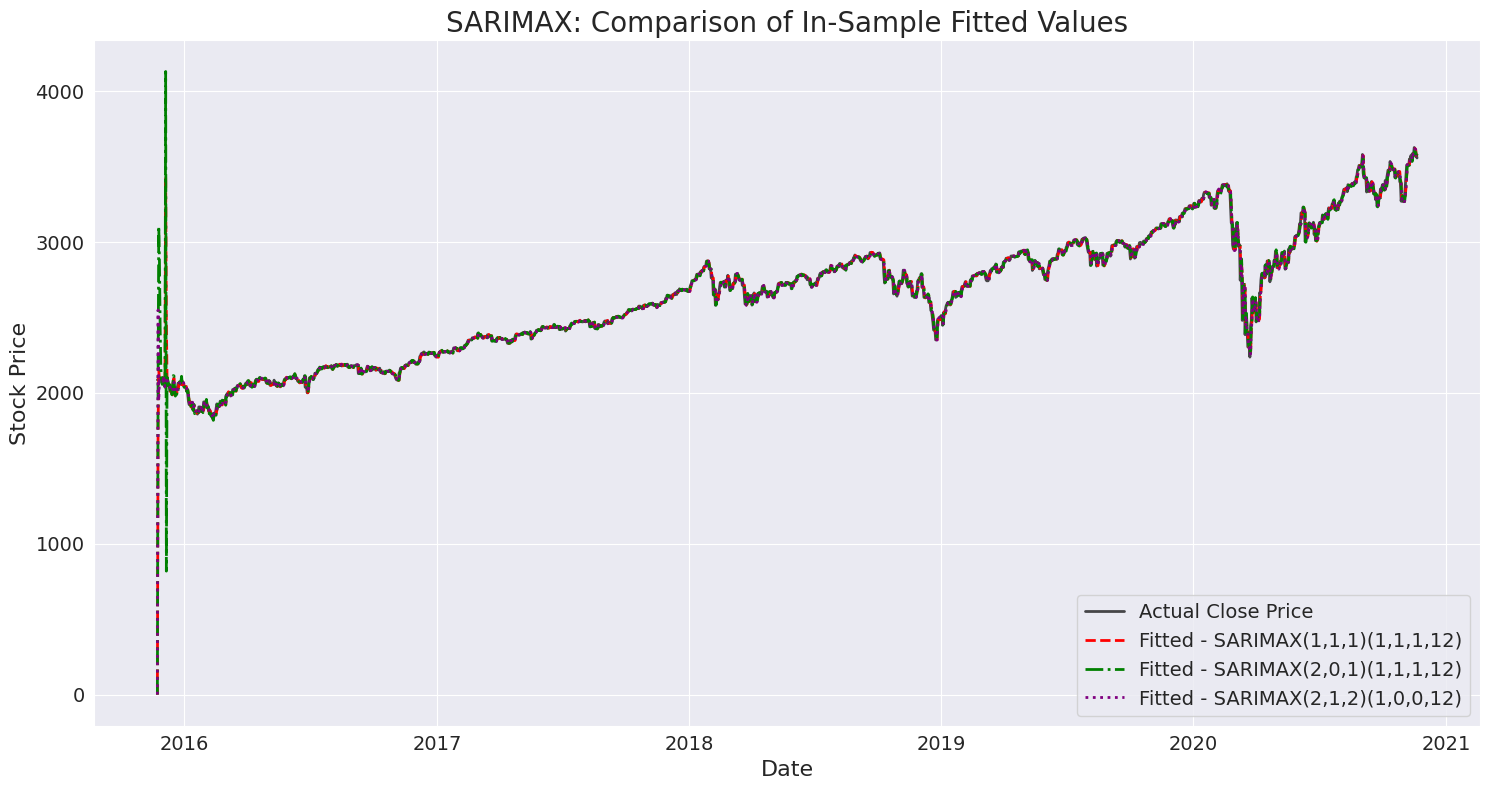

In [ ]:
# Ensure all required variables from Cell 1 are available and valid

if 'ts_data_close' in locals() and not ts_data_close.empty and \
   'sarimax_results1' in locals() and hasattr(sarimax_results1, 'fittedvalues') and \
   'sarimax_results2' in locals() and hasattr(sarimax_results2, 'fittedvalues') and \
   'sarimax_results3' in locals() and hasattr(sarimax_results3, 'fittedvalues'):

    # Plot actual and fitted values
    plt.figure(figsize=(15, 8))
    plt.plot(ts_data_close, label='Actual Close Price', color='black', alpha=0.7)

    plt.plot(sarimax_results1.fittedvalues, label=f'Fitted - {model1_name}', color='red', linestyle='--')
    plt.plot(sarimax_results2.fittedvalues, label=f'Fitted - {model2_name}', color='green', linestyle='-.')
    plt.plot(sarimax_results3.fittedvalues, label=f'Fitted - {model3_name}', color='purple', linestyle=':')

    plt.title('SARIMAX: Comparison of In-Sample Fitted Values')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Could not plot in-sample fitted values. Please check variable availability, data, and model attributes from Cell 1.")

## Comparison of Future Forecasts

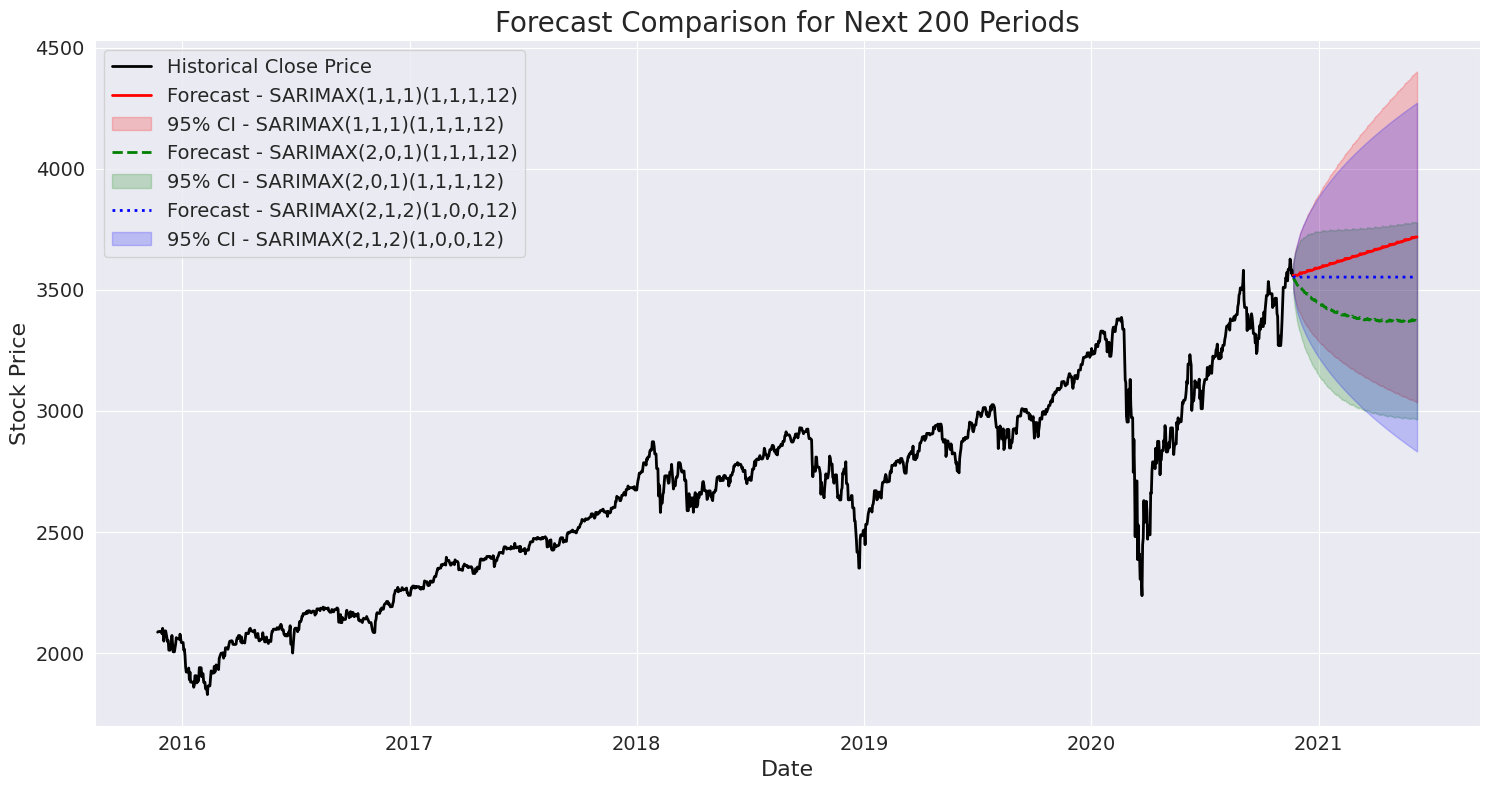

In [ ]:
# Ensure all required variables from Cell 1 are available and valid
if 'ts_data_close' in locals() and not ts_data_close.empty and \
   'sarimax_results1' in locals() and hasattr(sarimax_results1, 'get_forecast') and \
   'sarimax_results2' in locals() and hasattr(sarimax_results2, 'get_forecast') and \
   'sarimax_results3' in locals() and hasattr(sarimax_results3, 'get_forecast'):

    forecast_steps = 200  # Number of steps to forecast

    # Create forecast objects
    forecast_obj1 = sarimax_results1.get_forecast(steps=forecast_steps)
    forecast_obj2 = sarimax_results2.get_forecast(steps=forecast_steps)
    forecast_obj3 = sarimax_results3.get_forecast(steps=forecast_steps)

    # Extract predicted means and confidence intervals
    predicted_mean1 = forecast_obj1.predicted_mean
    conf_int1 = forecast_obj1.conf_int()

    predicted_mean2 = forecast_obj2.predicted_mean
    conf_int2 = forecast_obj2.conf_int()

    predicted_mean3 = forecast_obj3.predicted_mean
    conf_int3 = forecast_obj3.conf_int()

    # Plotting
    plt.figure(figsize=(15, 8))
    plt.plot(ts_data_close, label='Historical Close Price', color='black')

    # Forecast for Model 1
    plt.plot(predicted_mean1, label=f'Forecast - {model1_name}', color='red')
    plt.fill_between(predicted_mean1.index, conf_int1.iloc[:, 0], conf_int1.iloc[:, 1],
                     color='red', alpha=0.2, label=f'95% CI - {model1_name}')

    # Forecast for Model 2
    plt.plot(predicted_mean2, label=f'Forecast - {model2_name}', color='green', linestyle='--')
    plt.fill_between(predicted_mean2.index, conf_int2.iloc[:, 0], conf_int2.iloc[:, 1],
                     color='green', alpha=0.2, label=f'95% CI - {model2_name}')

    # Forecast for Model 3
    plt.plot(predicted_mean3, label=f'Forecast - {model3_name}', color='blue', linestyle=':')
    plt.fill_between(predicted_mean3.index, conf_int3.iloc[:, 0], conf_int3.iloc[:, 1],
                     color='blue', alpha=0.2, label=f'95% CI - {model3_name}')

    plt.title(f'Forecast Comparison for Next {forecast_steps} Periods')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Could not plot forecast comparison. Please check variable availability, data, and model attributes from Cell 1 and previous model fitting cells.")

## Tabular and Bar Plot Comparison of Metrics (AIC, BIC, RMSE)


--- Model Performance Metrics Comparison ---
                                   AIC           BIC     RMSE
SARIMAX(1,1,1)(1,1,1,12)  17014.006640  17041.478791  65.1399
SARIMAX(2,0,1)(1,1,1,12)  17105.652924  17138.622841  85.3284
SARIMAX(2,1,2)(1,0,0,12)  17067.226854  17100.233346  56.8642


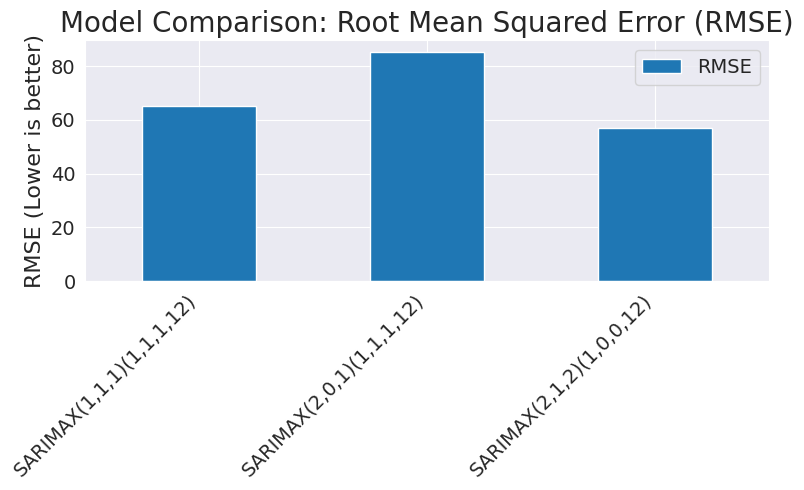

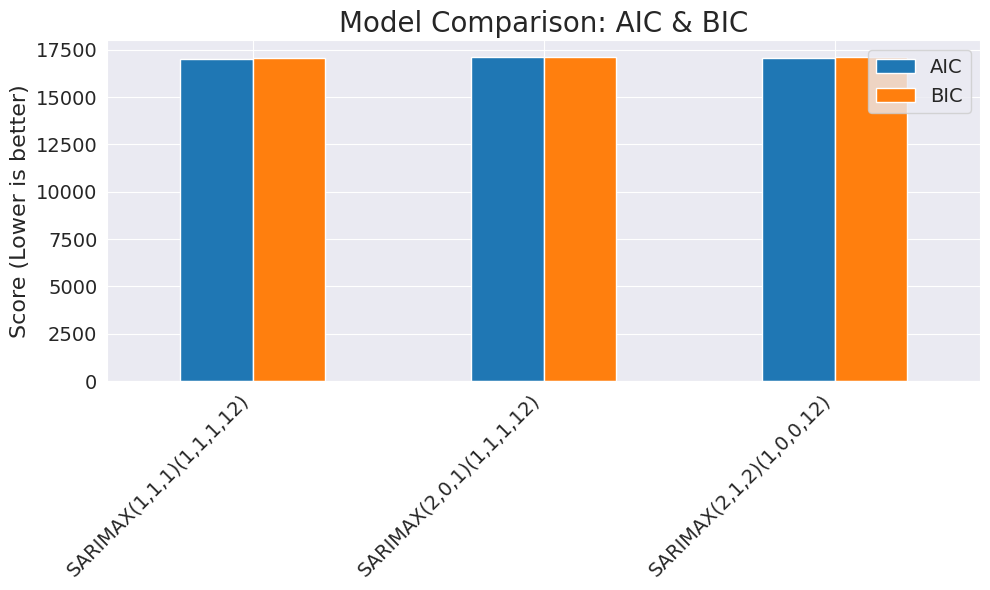

In [ ]:
# Ensure all required variables are available and valid
if (
    'sarimax_results1' in locals() and hasattr(sarimax_results1, 'aic') and
    'sarimax_results2' in locals() and hasattr(sarimax_results2, 'aic') and
    'sarimax_results3' in locals() and hasattr(sarimax_results3, 'aic') and
    'rmse_model1' in locals() and 'rmse_model2' in locals() and 'rmse_model3' in locals()
):

    # Extract metrics
    metrics_data = {
        model1_name: {
            'AIC': sarimax_results1.aic,
            'BIC': sarimax_results1.bic,
            'RMSE': rmse_model1
        },
        model2_name: {
            'AIC': sarimax_results2.aic,
            'BIC': sarimax_results2.bic,
            'RMSE': rmse_model2
        },
        model3_name: {
            'AIC': sarimax_results3.aic,
            'BIC': sarimax_results3.bic,
            'RMSE': rmse_model3
        }
    }

    # Convert to DataFrame
    metrics_df = pd.DataFrame(metrics_data).T  # Transpose: models as rows

    print("\n--- Model Performance Metrics Comparison ---")
    print(metrics_df)

    # Plot RMSE comparison
    metrics_df[['RMSE']].plot(kind='bar', figsize=(8, 5), legend=True)
    plt.title('Model Comparison: Root Mean Squared Error (RMSE)')
    plt.ylabel('RMSE (Lower is better)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Plot AIC and BIC comparison
    metrics_df[['AIC', 'BIC']].plot(kind='bar', figsize=(10, 6), legend=True)
    plt.title('Model Comparison: AIC & BIC')
    plt.ylabel('Score (Lower is better)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("Could not generate metrics comparison table/plots. Please check variable availability (including RMSE values) and model attributes from Cell 1.")

## Residual Diagnostic Plots for sarimax_results1


Generating Residual Diagnostic Plots for: SARIMAX(1,1,1)(1,1,1,12)


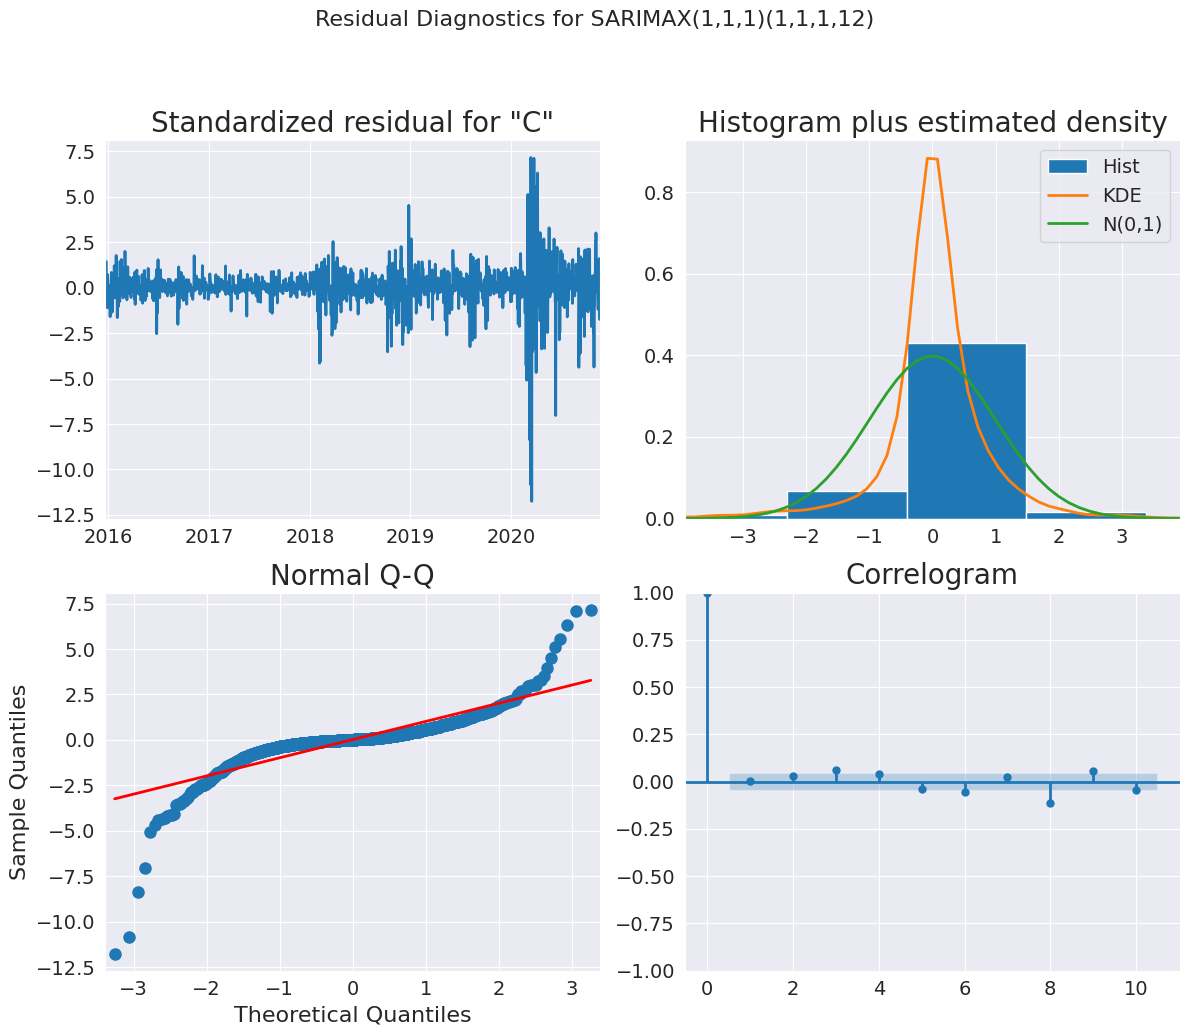

In [ ]:
import matplotlib.pyplot as plt # Ensure this is imported

# --- Ensure sarimax_results1 and model1_name are available from previous cells ---
# model1_name = "SARIMAX(1,1,1)(1,1,1,12)" # Should be defined from previous comparison cells

if 'sarimax_results1' in locals() and hasattr(sarimax_results1, 'plot_diagnostics'):
    print(f"\nGenerating Residual Diagnostic Plots for: {model1_name}")

    # The plot_diagnostics method returns a Figure object
    fig1_diag = sarimax_results1.plot_diagnostics(figsize=(12, 10)) # You can adjust figsize

    # Add a clear super title to the entire figure
    fig1_diag.suptitle(f'Residual Diagnostics for {model1_name}', fontsize=16, y=1.03) # y adjusts vertical position
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for the super title
    plt.show()
else:
    print(f"Warning: 'sarimax_results1' not found or does not support plot_diagnostics. Cannot generate diagnostics for {model1_name}.")

## Residual Diagnostic Plots for sarimax_results2


Generating Residual Diagnostic Plots for: SARIMAX(2,0,1)(1,1,1,12)


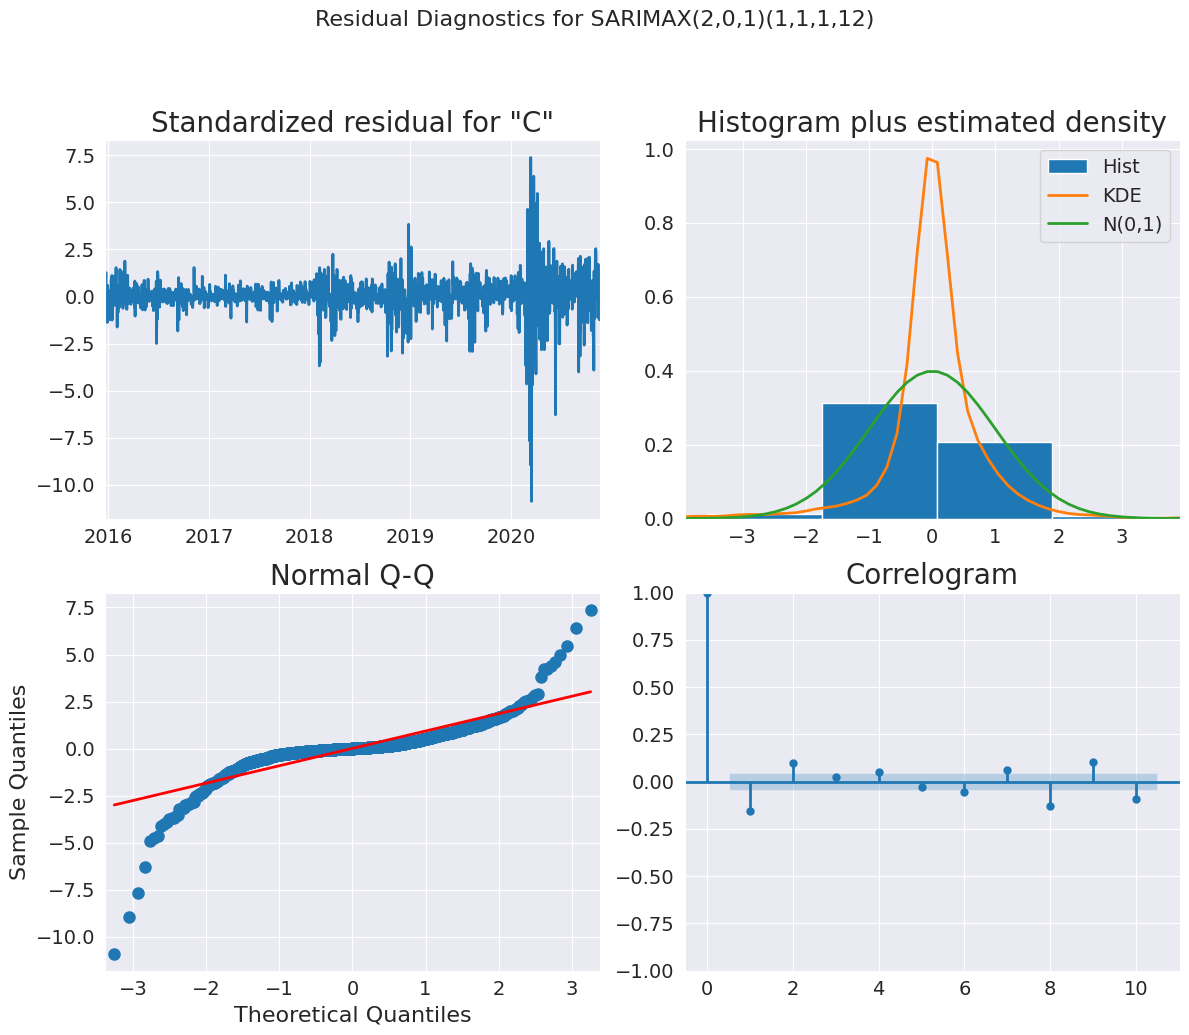

In [ ]:
# --- Ensure sarimax_results2 and model2_name are available from previous cells ---
# model2_name = "SARIMAX(2,0,1)(1,1,1,12)" # Should be defined from previous comparison cells

if 'sarimax_results2' in locals() and hasattr(sarimax_results2, 'plot_diagnostics'):
    print(f"\nGenerating Residual Diagnostic Plots for: {model2_name}")

    fig2_diag = sarimax_results2.plot_diagnostics(figsize=(12, 10)) # You can adjust figsize

    # Add a clear super title
    fig2_diag.suptitle(f'Residual Diagnostics for {model2_name}', fontsize=16, y=1.03)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout
    plt.show()
else:
    print(f"Warning: 'sarimax_results2' not found or does not support plot_diagnostics. Cannot generate diagnostics for {model2_name}.")

## Residual Diagnostic Plots for sarimax_results3


Generating Residual Diagnostic Plots for: SARIMAX(2,1,2)(1,0,0,12)


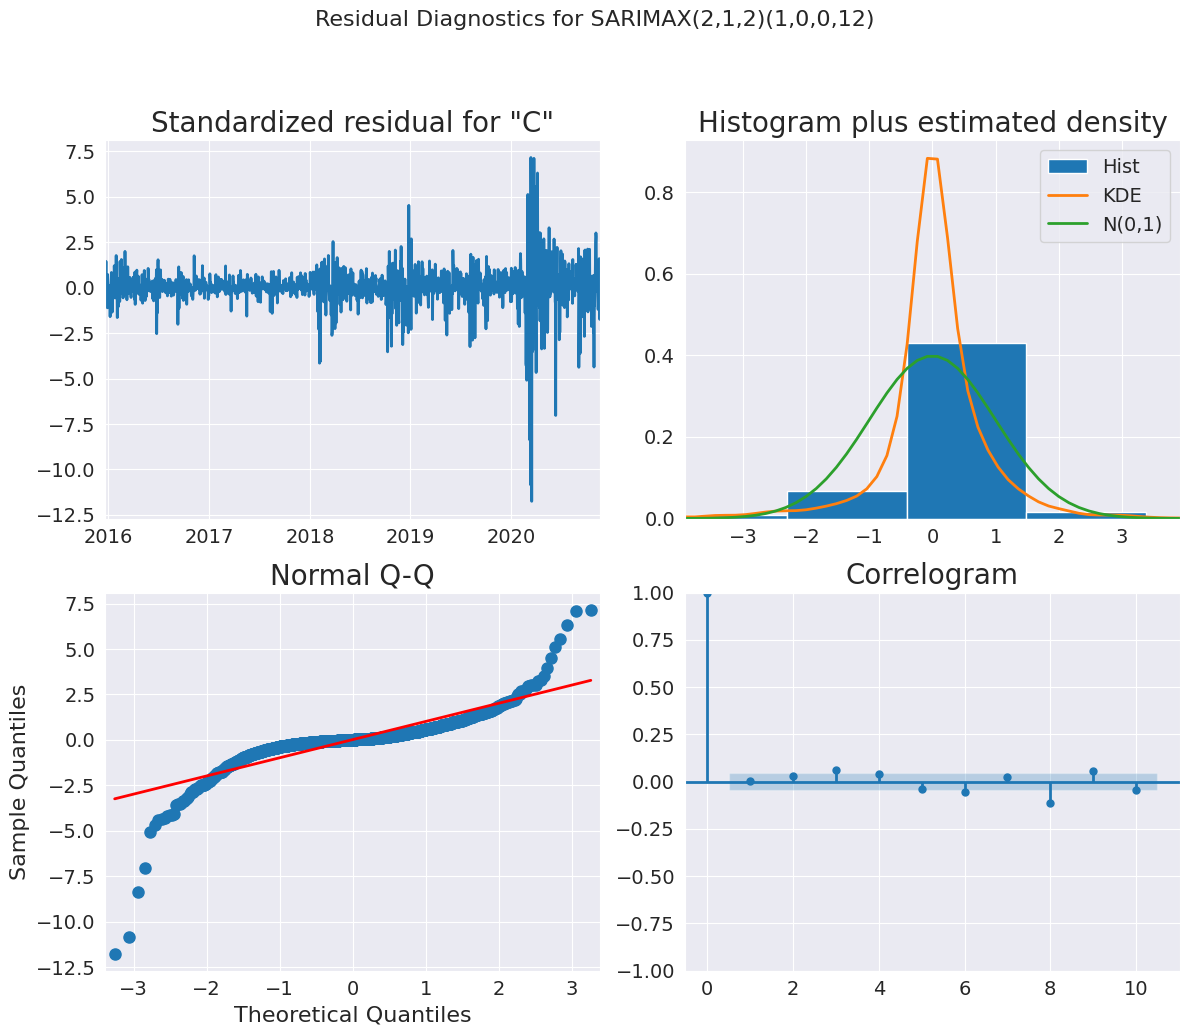

In [ ]:
# --- Ensure sarimax_results1 and model1_name are available from previous cells ---
# model3_name = "SARIMAX(2,1,2)(1,0,0,12)" # Should be defined from previous comparison cells

if 'sarimax_results3' in locals() and hasattr(sarimax_results3, 'plot_diagnostics'):
    print(f"\nGenerating Residual Diagnostic Plots for: {model3_name}")

    # The plot_diagnostics method returns a Figure object
    fig1_diag = sarimax_results1.plot_diagnostics(figsize=(12, 10)) # You can adjust figsize

    # Add a clear super title to the entire figure
    fig1_diag.suptitle(f'Residual Diagnostics for {model3_name}', fontsize=16, y=1.03) # y adjusts vertical position
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for the super title
    plt.show()
else:
  print(f"Warning: 'sarimax_results3' not found or does not support plot_diagnostics. Cannot generate diagnostics for {model3_name}.")

## SARIMAX Model Comparison: Conclusion and Next Steps

**Date:** May 7, 2025

### 1. Overview
Two SARIMAX models were fitted and evaluated for the 'Close' price time series:
* **Model 1:** `SARIMAX(1,1,1)(1,1,1,12)`
* **Model 2:** `SARIMAX(2,0,1)(1,1,1,12)`

The evaluation involved comparing quantitative metrics (AIC, BIC, RMSE), visual inspection of in-sample fits and forecasts, and detailed analysis of residual diagnostics.

### 2. Preferred Model
Based on the comprehensive analysis, **Model 1: `SARIMAX(1,1,1)(1,1,1,12)`** is preferred over Model 2.

### 3. Reasons for Preference (Model 1)
* **Superior Quantitative Metrics:** Model 1 demonstrated better performance with a lower AIC (17014.007 vs 17105.653), lower BIC (17041.479 vs 17138.623), and notably lower in-sample RMSE (65.1399 vs 85.3284) compared to Model 2.
* **Better Residual Autocorrelation Properties:** The diagnostic plots for Model 1, particularly the correlogram (ACF plot) of its residuals, showed no significant autocorrelation after lag 0. This aligns with its high Ljung-Box p-value (0.88) and suggests that the model has adequately captured the linear dependencies in the time series.
* **Good In-Sample Visual Fit:** Both models visually tracked the historical data well, but Model 1's better metrics give it an edge.

### 4. Acknowledged Limitations & Issues with Preferred Model (Model 1)
While Model 1 is preferred, it's important to note its limitations:
* **Non-Normal Residuals:** The residuals are not normally distributed; they exhibit leptokurtosis (peakedness) and heavy tails, as indicated by the Histogram, Q-Q plot, and the Jarque-Bera test (Prob(JB): 0.00).
* **Heteroskedasticity (Volatility Clustering):** The standardized residuals show periods of varying volatility, confirmed by the Heteroskedasticity test (Prob(H): 0.00). This means the assumption of constant variance for residuals is violated.
* **Seasonal MA Coefficient Concern:** In the initial numerical summary for Model 1, the seasonal moving average term (`ma.S.L12`) was statistically insignificant with a very large standard error and a coefficient value at the boundary (-1.0). While the overall model's residuals appear well-behaved in terms of autocorrelation, this specific coefficient issue is worth noting.

### 5. Concerns with Model 2 (`SARIMAX(2,0,1)(1,1,1,12)`)
* **Inferior Quantitative Metrics:** Model 2 had higher AIC, BIC, and RMSE values.
* **Residual Autocorrelation:** The diagnostic plots for Model 2 revealed significant autocorrelation remaining in the residuals, particularly at lag 1. This was supported by its low Ljung-Box p-value (0.00), indicating that the model failed to capture all the linear structure in the data, making it less reliable.

### 6. Recommendations for Next Steps
1.  **Refine Preferred Model (Model 1):**
    * Given the potential issue with the seasonal MA term in Model 1, consider fitting a slightly simplified version, such as `SARIMAX(1,1,1)(1,1,0,12)` (removing seasonal MA) or `SARIMAX(1,1,1)(1,0,0,12)` (using only seasonal AR), or even `SARIMAX(1,1,1)(0,0,0,0)` (effectively an ARIMA(1,1,1) if seasonality `s=12` is not strongly justified). Compare its metrics and diagnostics to the current Model 1.
2.  **Out-of-Sample Validation:**
    * Perform a more rigorous evaluation by splitting the data into training and testing sets. Fit the preferred model (and any refined versions) on the training set and evaluate its forecasting accuracy on the unseen test set. This will provide a better estimate of its true predictive power.
3.  **Address Non-Normality/Heteroskedasticity (If Critical):**
    * Acknowledge that these are common features in financial time series. If precise confidence intervals or volatility predictions are crucial, more advanced models like SARIMA-GARCH could be explored. However, for mean forecasting, SARIMA can still be useful if residuals are uncorrelated.
4.  **Iterate:** Model building is an iterative process. Based on the outcomes of the above steps, further refinements or model choices may be necessary.

In conclusion, Model 1 (`SARIMAX(1,1,1)(1,1,1,12)`) provides the best balance of fit and residual behavior among the two models evaluated, but with noted areas for potential minor refinement and awareness of its residuals' characteristics.

# Deep Learning:LSTM

Cross-validation scores: [0.00012718500511255115, 0.000468425132567063, 0.0007726185722276568, 0.0005467496230266988, 0.003975630272179842]
Mean CV score: 0.0011781217210227624
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Root Mean Squared Error: 57.350151605822305
Mean Absolute Error: 36.55484234908165
R-squared Score: 0.9797782064870991


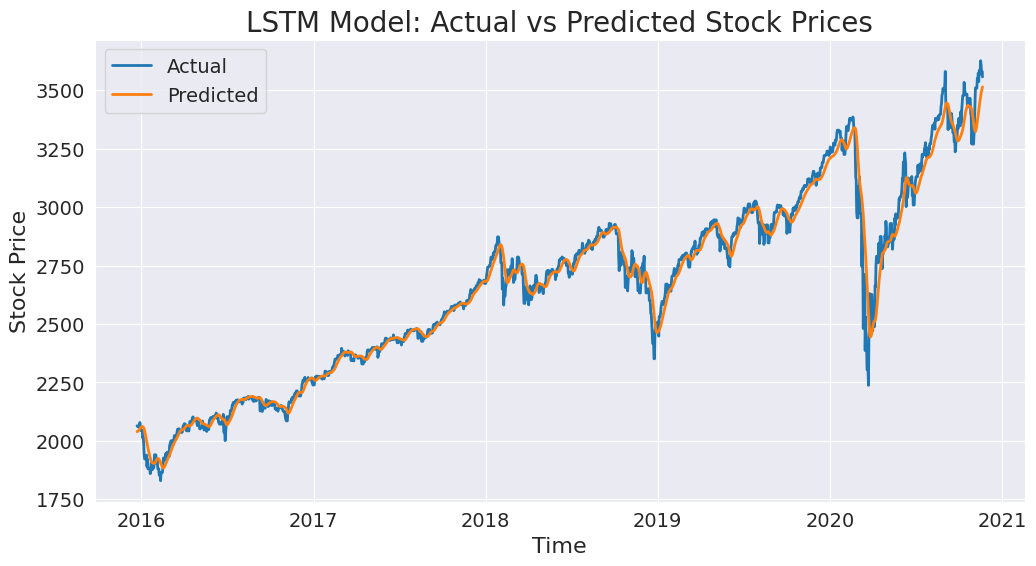

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
data = data.sort_values('Date').set_index('Date')['Close']

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=5)

# Perform Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model.fit(X_train, y_train, epochs=100, batch_size=32,
              validation_data=(X_val, y_val),
              callbacks=[early_stopping, lr_reducer], verbose=0)

    score = model.evaluate(X_val, y_val, verbose=0)
    cv_scores.append(score)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Inverse transform the predictions and actual values
y_pred_orig = scaler.inverse_transform(y_pred)
y_orig = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_orig, y_pred_orig))
mae = mean_absolute_error(y_orig, y_pred_orig)
r2 = r2_score(y_orig, y_pred_orig)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[seq_length:], y_orig, label='Actual')
plt.plot(data.index[seq_length:], y_pred_orig, label='Predicted')
plt.legend()
plt.title('LSTM Model: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Root Mean Squared Error: 106.06903128338412
Mean Absolute Error: 75.26371335850453
R-squared Score: 0.8508946598104611


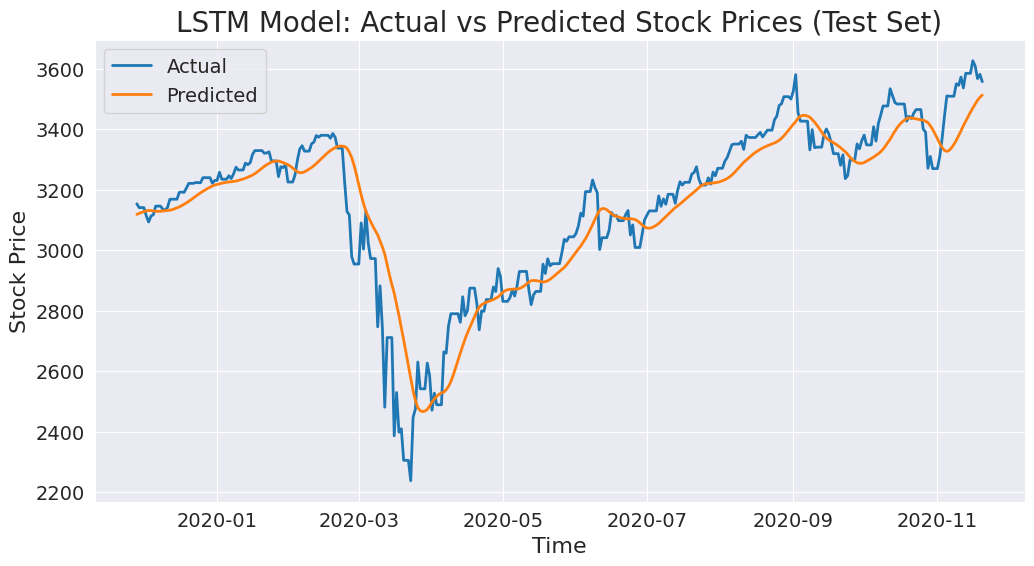

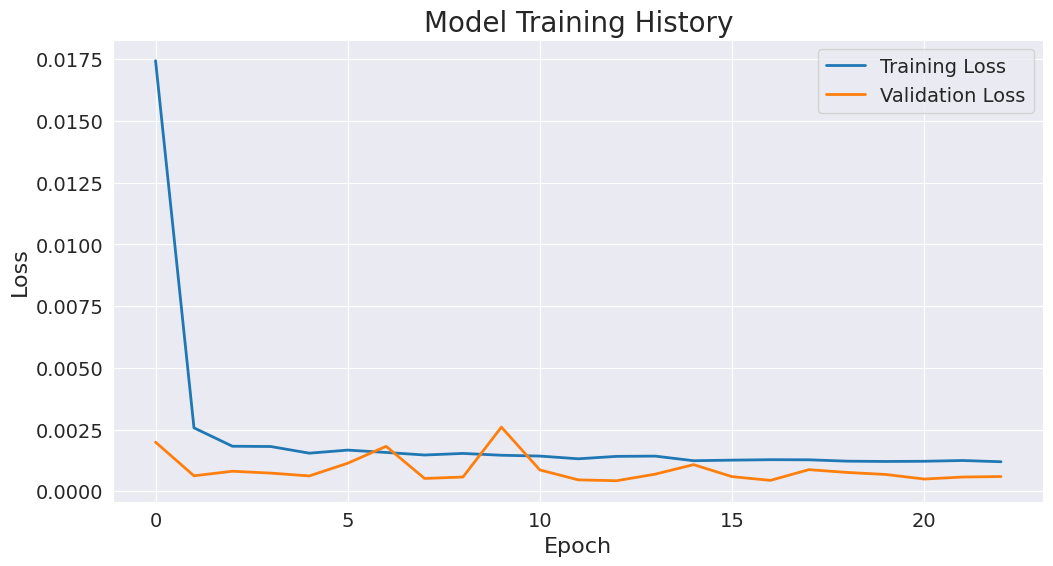

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the data
data = pd.read_csv("yahoo_stock.csv", parse_dates=['Date'])
data = data.sort_values('Date').set_index('Date')['Close']

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, lr_reducer], verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_orig = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+seq_length:], y_test_orig, label='Actual')
plt.plot(data.index[train_size+seq_length:], y_pred_orig, label='Predicted')
plt.legend()
plt.title('LSTM Model: Actual vs Predicted Stock Prices (Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()